# Machine Learning and Modeling  
## What we will cover

In the previous chapters, we looked at the larger field of artificial intelligence which relates to automating intellectual tasks performed by humans.  At one time, it was thought that all human decision making could be coded as a set of rules, which, if followed, would mimic intelligence.  The idea was that while these rules could be extremely complex in terms of their length and count, and in the way these were nested with each other, but in the end a set of properly structured if-else rules held the key to creating an artificial mind.  

Of course, we know now that is not accurate.  Rule based systems cannot generalize from patterns like the human mind does, and tend to be brittle to the point that they can be practically unusable.

Machine learning algorithms attempt to identify patterns in the data with which they create a solution to solve problems that haven't been seen before.  That is the topic for the discussion in this chapter.

Deep learning is a special case (or a subset) of machine learning where layers of data abstractions (called neural networks) are used.  However, you may hear of a distinction being sometimes made between machine learning, also sometimes called 'shallow learning', from deep learning that we will cover in the next chapter.  Machine learning is sometimes called 'shallow learning' because it is based on a single layer of data transformations.  It is called so to distinguish it from 'deep learning' that relies upon multiple layers of data transformations, with each layer extracting a different elements of useful information from the input.  

This is not to suggest that machine learning is less useful or less powerful than deep learning - on the contrary simpler algorithms regularly beat deep learning algorithms for certain kinds of tasks.  The type of learning to use is driven by the use case, performance obtained, and the desired explainability.

Next, we will cover the key machine learning algorithms that are used for classification, regression and clustering.  We will cover deep learning in the next chapter.  

**Agenda:**  

1. Decision Trees  
2. Random Forest  
3. XGBoost  
4. Linear Discriminant Analysis  
5. Support Vector Machines  
6. Naïve Bayes  
7. K-Nearest Neighbors  
8. K-Means Clustering  
9. Hierarchical Clustering  


All our work will follow the ML workflow discussed earlier, and repeated below:

1. Prepare your data – cleanse, convert to numbers, etc
2. Split the data into training and test sets
    - Training sets are what algorithms learn from
    - Test sets are the ‘hold-out’ data on which model effectiveness is measured
    - No set rules, often a 80:20 split between train and test data suffices.  If there is a lot of training data, you may keep a smaller number as the test set.
2. Fit a model.  
3. Check model accuracy based on the test set. 
4. Use for predictions.

**What you need to think about**  
As we cover the algorithms, think about the below ideas for each.

1. What is the conceptual basis for the algorithm?  
    - This will help you think about the problems the algorithm can be applied to,
    - You should also think about the parameters you can control in the model,  
    - You should think about model explainability, how essential is it to your use case, and who your audience is.
2. Do you need to scale/standardize the data?
    - Or can you use the raw data as is?
3. Whether it can perform regression, classification or clustering
    - Regression models help forecast numeric quantities, while classification algorithms help determine class membership.
    - Some algorithms can only perform either regression or classification, while others can do both.
4. If it is a classification algorithm, does it provide just the class membership, or probability estimates
    - If reliable probability estimates are available from the model, you can perform more advanced model evaluations, and tweak the probability cut-off to obtain your desired True Positive/False Positive rates.

**Some library imports first...**

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

## Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.  The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.  In simple words, decision trees are a collection of if/else conditions that are applied to data till a prediction is reached.  Trees are constructed by splitting data by a variable, and then doing the same again and again till the desired level of accuracy is reached (or we run out of data).  Trees can be visualized, and are therefore easier to interpret – and in that sense they are a ‘white box model’.  

**Trivial Example**  
Consider a made-up dataset where we know the employment and housing status of our customers, and whether they have paid back or defaulted on their loans.  When a new customer requests a loan, can we use this data to decide the whether there is likely to be a default?

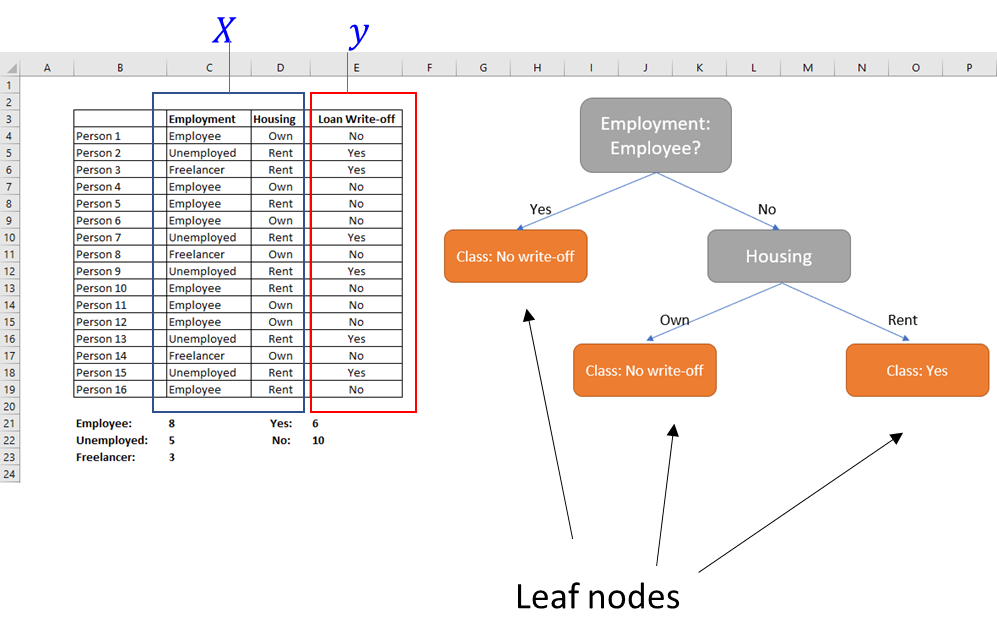

We would like the ‘leaf nodes’ to be pure, ie contain instances that tend to belong to the same class.  

Several practical issues arise in the above example:
 - Attributes rarely neatly split a group.  In the made up example, everything lined up neatly but rarely will in reality.  
 - How does one select what order to select attributes in?  We could have started with housing instead of looking at whether a person was an employee or not.  
 - Many attributes will not be binary, may have multiple unique values.  
 - Some attributes may be numeric.  For example, we may know their credit scores.  In such a case, how do we split the nodes?  
 - Finally, how do we decide we are done?  Should we keep going till we run out of variables, or till all leaf nodes are pure?  



### Measuring Purity - Entropy and Gini Impurity  
**Entropy**  
The most common splitting criterion is called information gain, and is based on a measure called entropy.
Entropy is a measure of disorder that can be applied to a collection.   
Disorder corresponds to how mixed (impure) the group is with respect to the properties of interest.  

$\mbox{Entropy} = -p_1 log_2(p_1) -p_2 log_2(p_2) - ...$  

A node is pure when entropy = 0.  So we are looking for ways to minimize entropy.  


**Gini Impurity**  
Another measure of impurity is the Gini Impurity.  
$\mbox{Gini Index} = 1 - p_1^2 - p_2^2 $


Like entropy, the Gini Impurity has a minimum of 0.  In a two class problem, the maximum value for the Gini Impurity will be 0.5.  Both Entropy and the Gini Impurity behave similarly, the Gini Impurity is supposedly less computationally intensive.  


With entropy as the measure of disorder, we calculate Information Gain offered by each attribute when used as the basis of segmentation.  

Information gain is the reduction in entropy by splitting our data on the basis of a single attribute.  

For our toy example, the entropy for the top parent node was 0.95.  This was reduced to 0.41 at the next child node, calculated as $p(c_1) * entropy(c_1) + p(c_2) * entropy(c_2) + ...$.  We start our segmentation with the attribute that provides the most information gain.  

Fortunately, automated algorithms do this for us, so we do not have to calculate any of this.  But the concept of information gain and how regression tree algorithms decide to split the data is important to be aware of.  




**Toy Example Continued**  
Let us continue the example introduced earlier.  

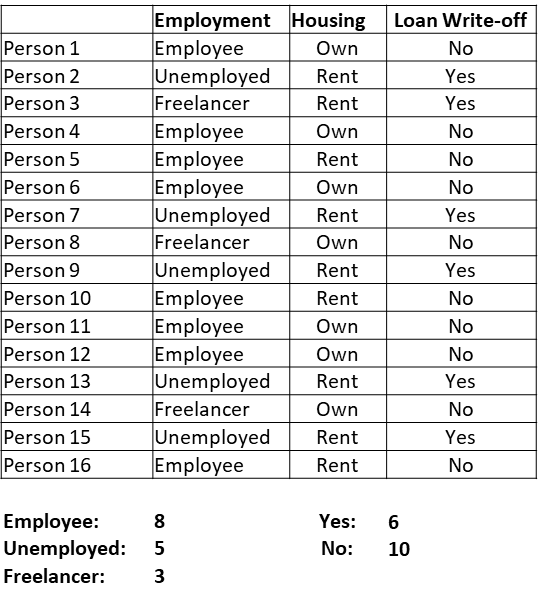


In [3]:
# Entropy before the first split
entropy1 = -((6/16) * np.log2(6/16))-((10/16) * np.log2(10/16))
entropy1

0.954434002924965

In [4]:
# Entroy after the split
entropy2 = \
(8/16) * (-(8/8) * np.log2(8/8)) \
+ \
((8/16) * (- (2/8) * np.log2(2/8) - (6/8) * np.log2(6/8) ))
entropy2

0.4056390622295664

In [5]:
#Information Gain
entropy1 - entropy2

0.5487949406953987

***
**Another simple example**  
We look at another example where we try to build a decision tree to predict whether a debt was written-off for a customer given other attributes.  

In [6]:
df = pd.read_excel('write-off.xlsx')

In [7]:
df

Name  Balance  Age Employed Write-off
0     Mike   200000   42       no       yes
1     Mary    35000   33      yes        no
2  Claudio   115000   40       no        no
3   Robert    29000   23      yes       yes
4     Dora    72000   31       no        no

Balance, Age and Employed are independent variables, and Write-off is the predicted variable. Of these, the Write-off and Employed columns are strings and have to be converted to numerical variables so they can be used in algorithms.

In [8]:
df['Write-off'] = df['Write-off'].astype('category') #convert to category
df['write-off-label'] = df['Write-off'].cat.codes #use category codes as labels
df = pd.get_dummies(df, columns=["Employed"]) #one hot encoding using pandas
df

Name  Balance  Age Write-off  write-off-label  Employed_no  Employed_yes
0     Mike   200000   42       yes                1         True         False
1     Mary    35000   33        no                0        False          True
2  Claudio   115000   40        no                0         True         False
3   Robert    29000   23       yes                1        False          True
4     Dora    72000   31        no                0         True         False

In [9]:
type(df['Write-off'])

pandas.core.series.Series

In [10]:
df = df.iloc[:,[0,3,4,1,2,5,6]]
df

Name Write-off  write-off-label  Balance  Age  Employed_no  Employed_yes
0     Mike       yes                1   200000   42         True         False
1     Mary        no                0    35000   33        False          True
2  Claudio        no                0   115000   40         True         False
3   Robert       yes                1    29000   23        False          True
4     Dora        no                0    72000   31         True         False

In [11]:
df.iloc[:, 2:]

write-off-label  Balance  Age  Employed_no  Employed_yes
0                1   200000   42         True         False
1                0    35000   33        False          True
2                0   115000   40         True         False
3                1    29000   23        False          True
4                0    72000   31         True         False

In [12]:
# This below command is required only to get back to the home folder if you aren't there already

# import os
# os.chdir('/home/jovyan')

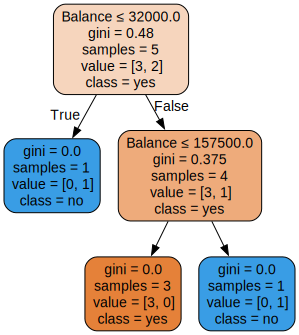

In [13]:
X = df.iloc[:,3:]
y = df.iloc[:,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("df") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['yes', 'no'],  # Plain English names for classes_
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [14]:
clf.classes_

array([0, 1], dtype=int8)

In [15]:
y

0    1
1    0
2    0
3    1
4    0
Name: write-off-label, dtype: int8

***
**Iris Flower Dataset**  
We consider the Iris dataset, a multivariate data set introduced by the British statistician and biologist Ronald Fisher in a 1936 paper.  The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).  

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.  

_Source: Wikipedia_  

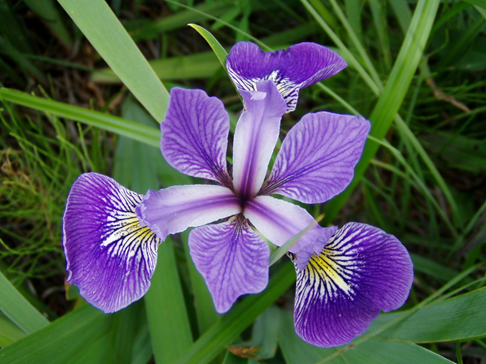  
_Image Source/Attribution: https://commons.wikimedia.org/w/index.php?curid=248095_
  
Difference between a petal and a sepal:  
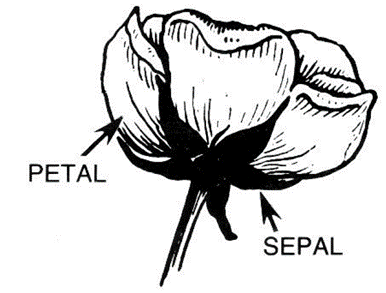
  
Scikit Learn’s decision tree classifier algorithm, combined with another package called graphviz, can provide decision trees together with good graphing capabilities.  

Unfortunately, sklearn requires all data to be numeric and as numpy arrays.  This creates practical problems for the data analyst – categorical variables have to be labeled or one-hot encoded, and their plain English meanings have to be tracked separately.  


In [16]:
# Load the data
iris = sm.datasets.get_rdataset('iris').data
iris.sample(6)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
19            5.1          3.8           1.5          0.3      setosa
7             5.0          3.4           1.5          0.2      setosa
18            5.7          3.8           1.7          0.3      setosa
94            5.6          2.7           4.2          1.3  versicolor
123           6.3          2.7           4.9          1.8   virginica
140           6.7          3.1           5.6          2.4   virginica

Our task is: Based on these features, can we create a decision tree to distinguish between the three species of the Iris flower?  

In [17]:
# Let us look at some basic descriptive stats for each of the flower species.  

iris.pivot_table(columns = ['Species'], aggfunc = ["mean", "min", "max"]).transpose()

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
     Species                                                         
mean setosa             1.462        0.246         5.006        3.428
     versicolor         4.260        1.326         5.936        2.770
     virginica          5.552        2.026         6.588        2.974
min  setosa             1.000        0.100         4.300        2.300
     versicolor         3.000        1.000         4.900        2.000
     virginica          4.500        1.400         4.900        2.200
max  setosa             1.900        0.600         5.800        4.400
     versicolor         5.100        1.800         7.000        3.400
     virginica          6.900        2.500         7.900        3.800

In [18]:
# Next, we build the decision tree  

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target

In [19]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

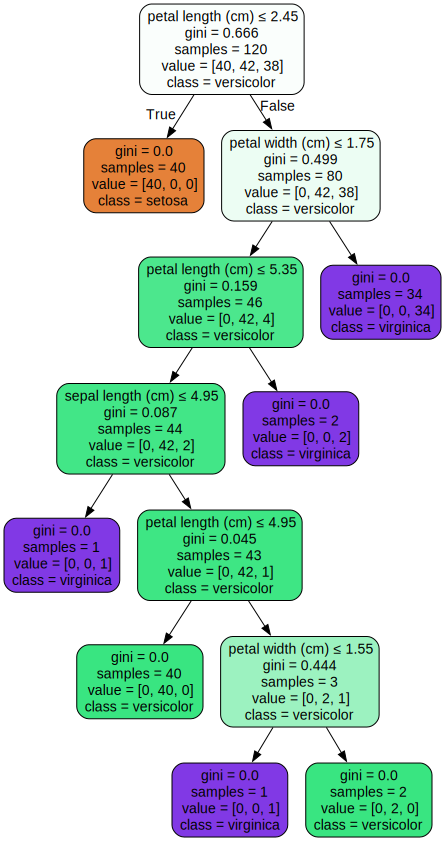

In [20]:
# Create the classifier and visualize the decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

[Text(0.5, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [40, 42, 38]'), Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'), Text(0.6666666666666666, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 42, 38]'), Text(0.5, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.159\nsamples = 46\nvalue = [0, 42, 4]'), Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.087\nsamples = 44\nvalue = [0, 42, 2]'), Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.5, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.045\nsamples = 43\nvalue = [0, 42, 1]'), Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'), Text(0.6666666666666666, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'), Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.8333333333333334, 0.0714285

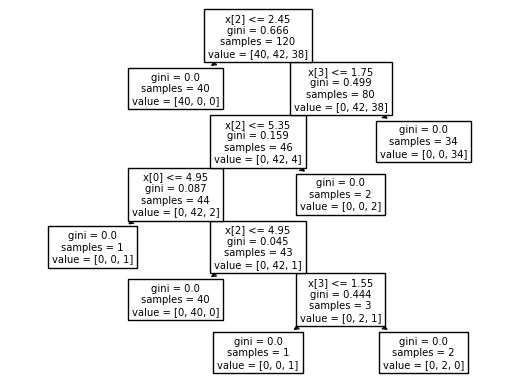

In [21]:
# Another way to build the tree is something as simple as 
# typing `tree.plot_tree(clf)` but the above code gives 
# us much better results.

print(tree.plot_tree(clf))

In [22]:
# List categories in the classifier
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
# Perform predictions
clf.predict(X_test)

array([1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 1, 1, 2, 2])

In [24]:
from sklearn.dummy import DummyClassifier
for strat in ["most_frequent", "prior", "stratified", "uniform",]:
    dummy_clf = DummyClassifier(strategy=strat)
    dummy_clf.fit(X, y)
    print(strat, dummy_clf.score(X, y))

most_frequent 0.3333333333333333
prior 0.3333333333333333
stratified 0.32
uniform 0.3333333333333333


In [25]:
.93/.36666

2.5364097529045986

### Confusion Matrix and Classification Report

We did not split the data into train/test sets.  For now, we will evaluate the model based on the entire data set (ie, on the training set).  

For this trivial example, the decision tree has done a perfect job of predicting flower species.


In [26]:
confusion_matrix(y_true = y_test, y_pred = clf.predict(X_test))

array([[10,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 12]], dtype=int64)

In [27]:
print(classification_report(y_true = y_test, y_pred = clf.predict(X_test), 
                            target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.75      0.86         8
   virginica       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



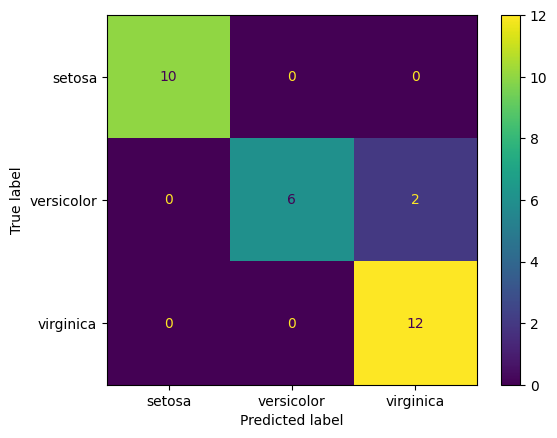

In [28]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=iris.target_names);

**Confusion Matrix for All Data**  

In [29]:
# Just for the heck of it, let us predict the entire dataset using our model, 
# and check the results
print(classification_report(y_true = y, y_pred = clf.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



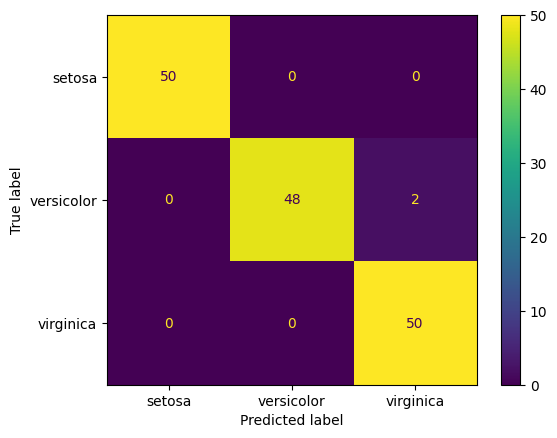

In [30]:
ConfusionMatrixDisplay.from_estimator(clf, X, y, display_labels=iris.target_names);

**Class probabilities with decision trees**  

Decision Trees do not do a great job of predicting the probability of belonging to a particular class, for example, when compared to Logistic Regression.  

Probabilities for class membership are just the proportion of observations in a particular class in the appropriate leaf node.  For a tree with unlimited nodes, we will always mostly have p=100% for most predictions.  

Scikit Learn provides a method to predict probabilities, `clf.predict_proba()`.  If we apply this to our decision tree (first five observations only), we get as below:   

In [31]:
# As can be seen below, the model does not give class probabilities
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# Get class probabilities
clf.predict_proba(X[:5])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

***
### Predictions with decision trees
**With this model, how do I predict if I have the measurements for a new flower?**  

Once a Decision Tree Classifier is built, new predictions can be obtained using the predict(X) method.  

Imagine we have a new flower with dimensions 5, 3, 1 and 2 and need to predict its species.
Since we have the featureset, we feed this information to the model and obtain the prediction.

Refer below for the steps in Python


In [33]:
# let us remind ourselves of what features need to predict a flower's species

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
# let us also look at existing feature set

X[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [35]:
# Next, the measurements for the new flower

new_flower = [[5,3,1,2]]

In [36]:
# Now the prediction

clf.predict(new_flower)

array([0])

In [37]:
# The above means it is the category at index 1 in the target
# Let us look at what the target names are.
# We see that the 'versicolor' is at index 1, so that is the prediction for the new flower

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
# or, all of the above in one line

print(iris.target_names[clf.predict(new_flower)])

['setosa']


### Decision Tree Regression
Decision trees can also be applied to estimating continuous values for the target variable.  

They work in the same way as decision trees for classification, except that information gain is measured differently, eg by a reduction in standard deviation at the node level.  

So splits for a node would be performed based on a variable/value that creates the maximum reduction in the standard deviation of the y values in the node.  

The prediction is then the average of the observations in the leaf node.  

As an example, let us consider the Boston House Price dataset that is built into sklearn.  There are 506 rows × 14 variables


In [39]:
# Load the data

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = housing['data']
y = housing['target']
features = housing['feature_names']
DESCR = housing['DESCR']

cali_df = pd.DataFrame(X, columns = features)
cali_df.insert(0,'medv', y)

In [40]:
cali_df

medv  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1      3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2      3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3      3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4      3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467   
...      ...     ...       ...       ...        ...         ...       ...   
20635  0.781  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636  0.771  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637  0.923  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  0.847  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639  0.894  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1         37.86    -122.22  
2         37.85    -122.24  
3         37.85    -122.25  
4         37.85    -122.25  
...         ...        ...  
20635     39.48    -121.09  
20636     39.49    -121.21  
20637     39.43    -121.22  
20638     39.43    -121.32  
20639     39.37    -121.24  

[20640 rows x 9 columns]

In [41]:
# Let us look at the data dictionary

print(DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

We can fit a decision tree regressor to the data.  
1. First, we load the data.  
1. Next, we split the data into train and test sets, keeping 20% for the test set.  
1. Then we fit a model to the training data, and store the model object in the variable model.  
1. Next we use the model to predict the test cases.  
1. Finally, we evaluate the results.  


In [42]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [43]:
# model = tree.DecisionTreeRegressor()
model = tree.DecisionTreeRegressor(max_depth=9)
model = model.fit(X_train, y_train)
model.predict(X_test)

array([1.25509811, 2.8641    , 2.48695804, ..., 4.80046348, 1.73728391,
       1.25713333])

In [44]:
print(model.tree_.max_depth)

9


In [45]:
y_pred  =  model.predict(X_test)

print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  0.407282084102605
RMSE =  0.6381865590112386
MAE =  0.425904164028772


In [46]:
# Just checking to see if we have everything working right

print('Count of predictions:', len(y_pred))
print('Count of ground truth labels:', len(y_test))

Count of predictions: 4128
Count of ground truth labels: 4128


Text(0, 0.5, 'Predicted')

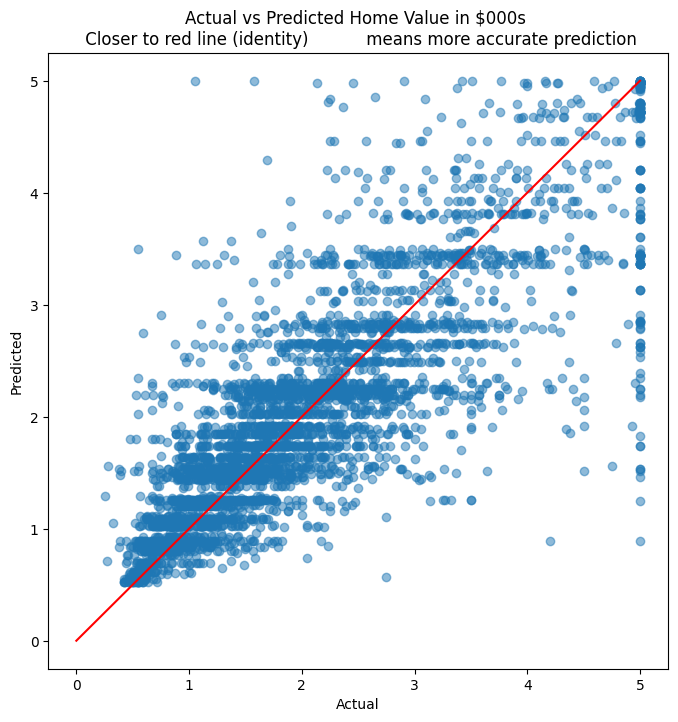

In [47]:
# We plot the actual home prices vs the predictions in a scatterplot

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red line (identity) \
          means more accurate prediction')
plt.plot( [0,5],[0,5], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [48]:
# Context for the RMSE.  What is the mean, min and max?

cali_df.medv.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: medv, dtype: float64

In [49]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

actual  predicted
actual     1.000000   0.697322
predicted  0.697322   1.000000

### How well did my model generalize?
Let us see how my model did on the training data

In [50]:
# R-squared
pd.DataFrame({'actual':y_train, 'predicted':model.predict(X_train)}).corr()**2

actual  predicted
actual     1.000000   0.800367
predicted  0.800367   1.000000

In [51]:
# Calculate MSE, RMSE and MAE

y_pred  =  model.predict(X_train)

print('MSE = ', mean_squared_error(y_train,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_train,y_pred)))
print('MAE = ', mean_absolute_error(y_train,y_pred))

MSE =  0.26603187792501465
RMSE =  0.515782781726004
MAE =  0.351922999495441


Text(0, 0.5, 'Predicted')

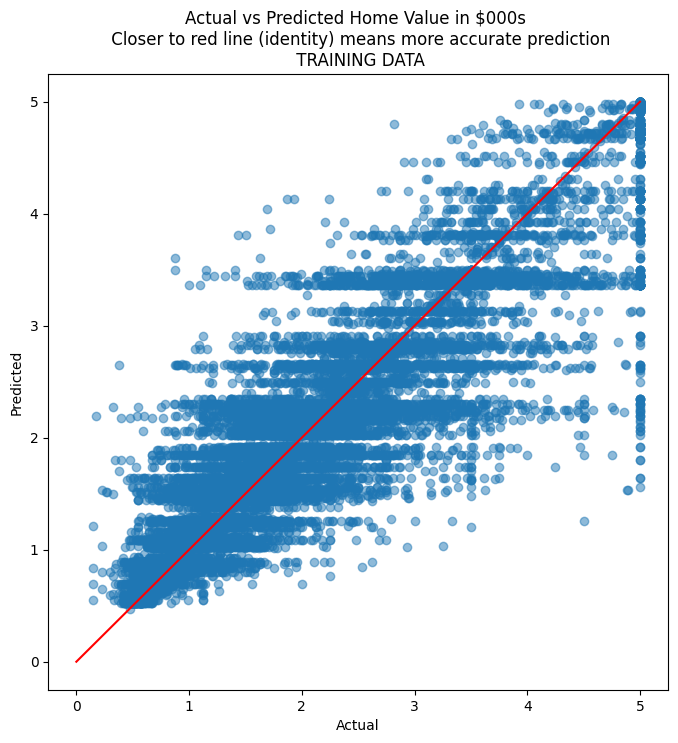

In [52]:
# Scatterplot for actual vs predicted on TRAINING data

plt.figure(figsize = (8,8))
plt.scatter(y_train, model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red line (identity) means more accurate prediction\n TRAINING DATA')
plt.plot( [0,5],[0,5], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

### Addressing Overfitting in Decision Trees
The simplest way to address overfitting in decision trees is to limit the depth of the trees using the `max_depth` parameter when fitting the model. The depth of a decision tree is the length of the longest path from a root to a leaf.

Find out the current value of the max tree depth in the example (`print(model.tree_.max_depth)`), and change the `max_depth` parameter to see if you can reduce the RMSE for the test set.

You can also change the minimum count of samples required to be present in a leaf node (`min_samples_leaf`), and the minimum number of observations required before a node is allowed to split (`min_samples_split`).


## Random Forest

A random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  

Random Forest almost always gives results superior to decision trees, and is therefore preferred over decision trees.  However, because the results provided by random forest are the result of averaging multiple trees, explainability can become an issue.  

Therefore decision trees may still be preferred over random forest in the interest of explainability.  


At this point, it is important to introduce two new concepts: bootstrapping, and bagging.  

**Bootstrapping**  
In bootstrapping, you treat the sample as if it were the population, and draw repeated samples of equal size from it.  The samples are drawn with replacement. Now think that for each of these new samples you calculate a population characteristic, say the median.  Because you potentially have a very large number of samples (theoretically infinite), you can get a distribution of the median of the population from our original single sample. 

If we hadn’t done bootstrapping (ie resample from the sample with replacement), we would have only one point estimate for the median.  

Bootstrapping improves the estimation process and reduces variance.

**Bagging (Bootstrap + Aggregation)**  
Bagging is a type of ensemble learning. Ensemble learning is where we combine multiple models to produce a better prediction or classification.  

In bagging, we produce multiple different training sets (called bootstrap samples), by sampling with replacement from the original dataset.  Then, for each bootstrap sample, we build a model.  
The results in an ensemble of models, where each model votes with the equal weight.  Typically, the goal of this procedure is to reduce the variance of the model of interest (e.g. decision trees).  

The Random Forest algorithm is when the above technique is applied to decision trees.  

**Random Forests**  
Random forests are an example of ensemble learning, where multiple models are combined to produce a better prediction or classification.  

Random forests are collections of trees.  Predictions are equivalent to the average prediction of component trees.  

Multiple decision trees are created from the source data using a technique called bagging.  Multiple different training sets (called bootstrap samples) are created by sampling with replacement from the original dataset.  

Then, for each bootstrap sample, we build a model. The results in an ensemble of models, where each model votes with the equal weight. Typically, the goal of this procedure is to reduce the variance of the model of interest.  

When applied to decision trees, this becomes random forest.  

### Random Forest for Classification  

In [53]:
# load the data

college = pd.read_csv('collegePlace.csv')
college.shape

(2966, 8)

In [54]:
college

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0                     1            1  
1                     1            1  
2                     0            1  
3                     1            1  
4                     0            1  
...                 ...          ...  
2961                  0            0  
2962                  0            0  
2963                  0            0  
2964                  0            0  
2965                  0            1  

[2966 rows x 8 columns]

In [55]:
# divide the dataset into train and test sets, separating the features and target variable

X = college[['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']]
X = pd.get_dummies(X)
y = college['PlacedOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
X

Age  Internships  CGPA  Hostel  HistoryOfBacklogs  Gender_Female  \
0      22            1     8       1                  1          False   
1      21            0     7       1                  1           True   
2      22            1     6       0                  0           True   
3      21            0     8       0                  1          False   
4      22            0     8       1                  0          False   
...   ...          ...   ...     ...                ...            ...   
2961   23            0     7       0                  0          False   
2962   23            1     7       1                  0          False   
2963   22            1     7       0                  0          False   
2964   22            1     7       0                  0          False   
2965   23            0     8       0                  0          False   

      Gender_Male  Stream_Civil  Stream_Computer Science  Stream_Electrical  \
0            True         False                    False              False   
1           False         False                     True              False   
2           False         False                    False              False   
3            True         False                    False              False   
4            True         False                    False              False   
...           ...           ...                      ...                ...   
2961         True         False                    False              False   
2962         True         False                    False              False   
2963         True         False                    False              False   
2964         True         False                     True              False   
2965         True          True                    False              False   

      Stream_Electronics And Communication  Stream_Information Technology  \
0                                     True                          False   
1                                    False                          False   
2                                    False                           True   
3                                    False                           True   
4                                    False                          False   
...                                    ...                            ...   
2961                                 False                           True   
2962                                 False                          False   
2963                                 False                           True   
2964                                 False                          False   
2965                                 False                          False   

      Stream_Mechanical  
0                 False  
1                 False  
2                 False  
3                 False  
4                  True  
...                 ...  
2961              False  
2962               True  
2963              False  
2964              False  
2965              False  

[2966 rows x 13 columns]

In [57]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [58]:
# classify using random forest classifier

RandomForest = RandomForestClassifier()
model_rf = RandomForest.fit(X_train, y_train)
pred = model_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       282
           1       0.89      0.80      0.84       312

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.85      0.85      0.85       594



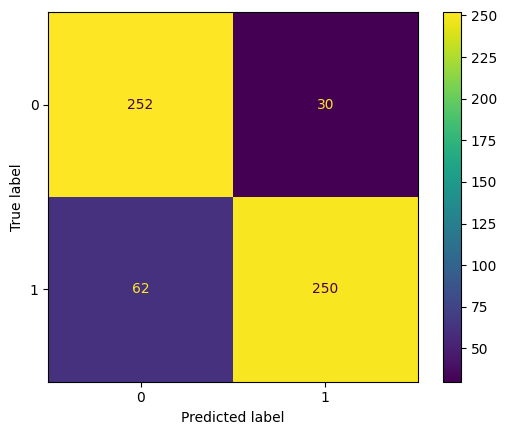

In [59]:
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test);

In [60]:
# get probabilities for each observation in the test set

model_rf.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.70828879, 0.29171121],
       ...,
       [0.01      , 0.99      ],
       [0.        , 1.        ],
       [0.83324058, 0.16675942]])

In [61]:
y_test

2307    1
1949    1
279     1
2681    1
1043    1
       ..
119     1
958     1
2794    1
1094    1
858     1
Name: PlacedOrNot, Length: 594, dtype: int64

In [62]:
# get probabilities for each observation in the test set

pred_prob = model_rf.predict_proba(X_test)[:,1]

In [63]:
model_rf.classes_

array([0, 1], dtype=int64)

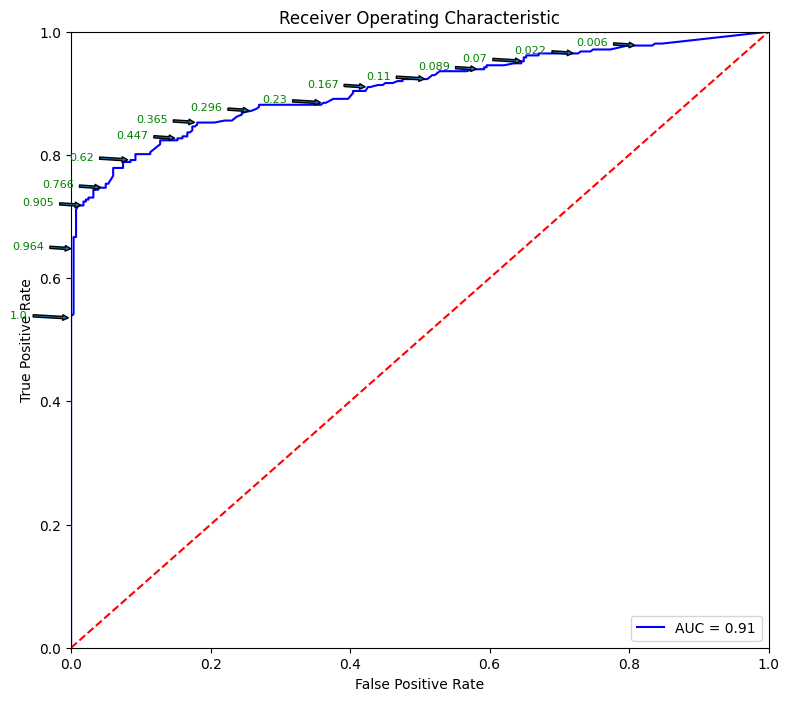

fpr       tpr  threshold
148  1.000000  1.000000   0.000000
147  0.847518  0.980769   0.000769
146  0.840426  0.980769   0.001425
145  0.836879  0.980769   0.002000
144  0.833333  0.977564   0.003529

In [64]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    if i in np.arange(1, len(thresholds), 10): # print every 10th point to prevent overplotting:
        plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                     xytext=(-44, 0), textcoords='offset points',
                     arrowprops={'arrowstyle':"simple"}, color='green',fontsize=8)
plt.show()

threshold_dataframe = pd.DataFrame({'fpr':fpr, 'tpr': tpr, 'threshold':thresholds}).sort_values(by='threshold')
threshold_dataframe.head()

### Random Forest for Regression
The Random Forest algorithm can also be used effectively for regression problems.  Let us try a larger dataset this time.  

We will try to predict diamond prices based on all the other attributes we know about the diamonds.  

However, our data contains a number of categorical variables.  We will need to convert these into numerical using one-hot encoding.  Let us do that next!


In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
diamonds = sns.load_dataset("diamonds")

In [67]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [68]:
diamonds = pd.get_dummies(diamonds)

In [69]:
diamonds.head()

carat  depth  table  price     x     y     z  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43       True        False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31      False         True   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      False        False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63      False         True   
4   0.31   63.3   58.0    335  4.34  4.35  2.75      False        False   

   cut_Very Good  ...  color_I  color_J  clarity_IF  clarity_VVS1  \
0          False  ...    False    False       False         False   
1          False  ...    False    False       False         False   
2          False  ...    False    False       False         False   
3          False  ...     True    False       False         False   
4          False  ...    False     True       False         False   

   clarity_VVS2  clarity_VS1  clarity_VS2  clarity_SI1  clarity_SI2  \
0         False        False        False        False         True   
1         False        False        False         True        False   
2         False         True        False        False        False   
3         False        False         True        False        False   
4         False        False        False        False         True   

   clarity_I1  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 27 columns]

In [70]:
# Define X and y as arrays. y is the price column, X is everything else

X = diamonds.loc[:, diamonds.columns != 'price'].values
y = diamonds.price.values

In [71]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [72]:
# Fit model

model_rf_regr = RandomForestRegressor(max_depth=2, random_state=0)
model_rf_regr.fit(X_train, y_train)
model_rf_regr.predict(X_test)

array([ 1059.31009133, 12350.68560599, 12301.17009557, ...,
       12350.68560599,  3053.9772504 ,  1059.31009133])

In [73]:
# Evaluate model

y_pred  =  model_rf_regr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  2784696.039961368
RMSE =  1668.7408546450129
MAE =  1044.8395188163472


Text(0, 0.5, 'Predicted')

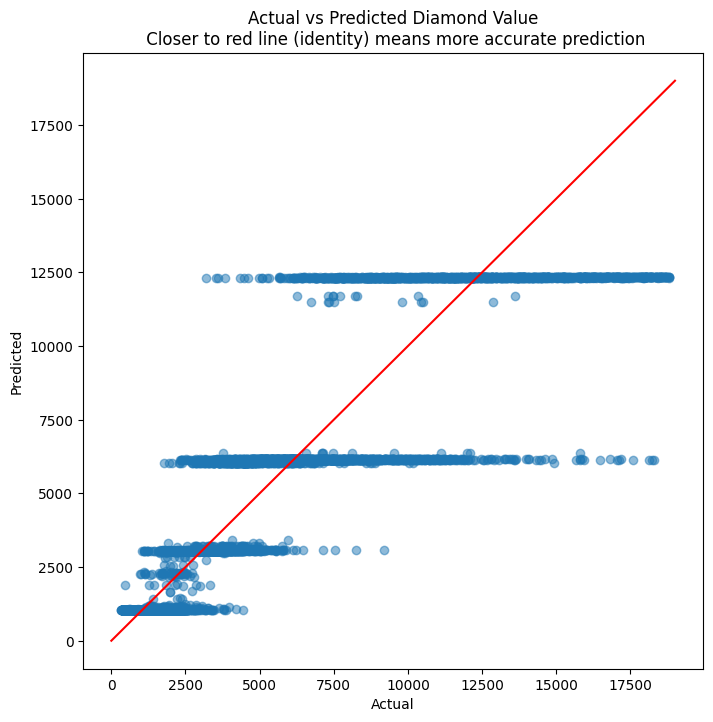

In [74]:
# Evaluate residuals

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Diamond Value\n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,19000],[0,19000], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [75]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [76]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

actual  predicted
actual     1.000000   0.826622
predicted  0.826622   1.000000

In [77]:
importance = model_rf_regr.feature_importances_
feature_names = diamonds.loc[:, diamonds.columns != 'price'].columns
pd.DataFrame({'Feature':feature_names, 'Importance':importance}).sort_values(by='Importance', ascending=False)

Feature  Importance
0           carat    0.724488
4               y    0.275116
5               z    0.000395
14        color_G    0.000000
24    clarity_SI2    0.000000
23    clarity_SI1    0.000000
22    clarity_VS2    0.000000
21    clarity_VS1    0.000000
20   clarity_VVS2    0.000000
19   clarity_VVS1    0.000000
18     clarity_IF    0.000000
17        color_J    0.000000
16        color_I    0.000000
15        color_H    0.000000
13        color_F    0.000000
1           depth    0.000000
12        color_E    0.000000
11        color_D    0.000000
10       cut_Fair    0.000000
9        cut_Good    0.000000
8   cut_Very Good    0.000000
7     cut_Premium    0.000000
6       cut_Ideal    0.000000
3               x    0.000000
2           table    0.000000
25     clarity_I1    0.000000

### Random Forest Regression - Another Example
Let us look at our California Housing Dataset that we examined before to predict home prices.  

In [78]:
# Load the data

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = housing['data']
y = housing['target']
features = housing['feature_names']
DESCR = housing['DESCR']

cali_df = pd.DataFrame(X, columns = features)
cali_df.insert(0,'medv', y)

In [79]:
cali_df

medv  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1      3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2      3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3      3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4      3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467   
...      ...     ...       ...       ...        ...         ...       ...   
20635  0.781  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636  0.771  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637  0.923  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  0.847  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639  0.894  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1         37.86    -122.22  
2         37.85    -122.24  
3         37.85    -122.25  
4         37.85    -122.25  
...         ...        ...  
20635     39.48    -121.09  
20636     39.49    -121.21  
20637     39.43    -121.22  
20638     39.43    -121.32  
20639     39.37    -121.24  

[20640 rows x 9 columns]

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [81]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [82]:
y_pred  =  model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  0.6661359423661871
RMSE =  0.8161715152871896
MAE =  0.6272888913440362


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: medv, dtype: float64


<Axes: ylabel='Frequency'>

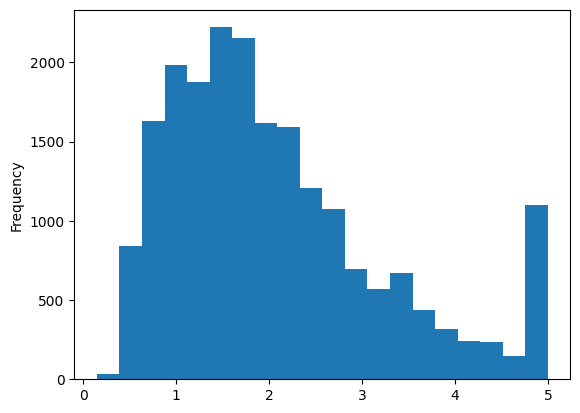

In [83]:
print(cali_df.medv.describe())
cali_df.medv.plot.hist(bins=20)

Text(0, 0.5, 'Predicted')

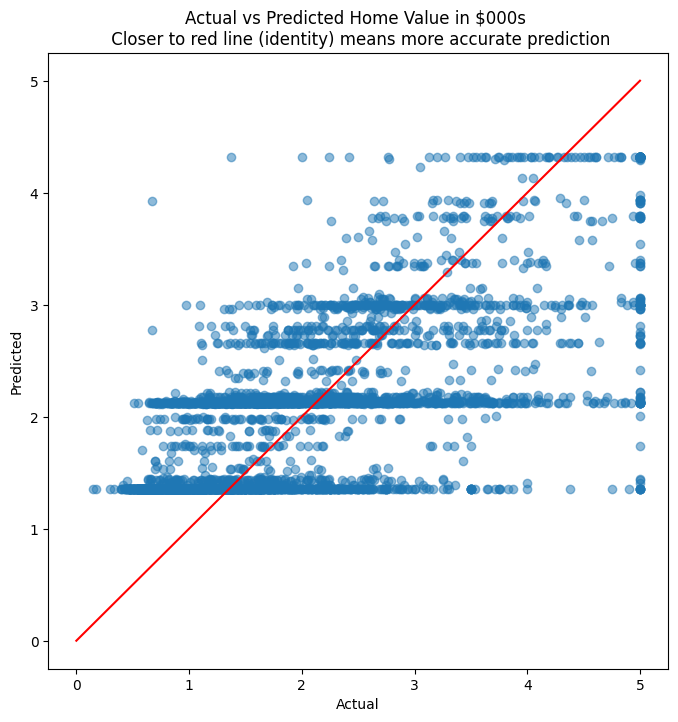

In [84]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,5],[0,5], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

## XGBoost
Like Random Forest, XGBoost is a tree based algorithm.  In Random Forest, multiple trees are built in parallel, and averaged.  In XGBoost, trees are built sequentially, with each tree correcting the errors of the previous one.  

Trees are built in sequence, with each next tree in the sequence targeting the errors of the previous one.  The trees are then added, with a multiplicative constant ‘learning rate’ between 0 and 1 applied to each tree.  

XGBoost has by far exceeded the performance of other algorithms, and is one of the most used algorithms on Kaggle. In many cases, it outperforms Neural Nets.  

Extensive documentation is available at https://xgboost.readthedocs.io/en/latest  

**Example**  
Let us consider our college placement dataset, and check if we are able to predict the ‘PlacedOrNot’ variable correctly.  

We will convert the categorical variables (stream of study, gender, etc) into numerical using one-hot encoding.  

We will keep 20% of the data as the test set, and fit a model using the XGBoost algorithm.  

### XGBoost - Classification

In [85]:
# load the data
college = pd.read_csv('collegePlace.csv')
college = pd.get_dummies(college)

In [86]:
college

Age  Internships  CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot  \
0      22            1     8       1                  1            1   
1      21            0     7       1                  1            1   
2      22            1     6       0                  0            1   
3      21            0     8       0                  1            1   
4      22            0     8       1                  0            1   
...   ...          ...   ...     ...                ...          ...   
2961   23            0     7       0                  0            0   
2962   23            1     7       1                  0            0   
2963   22            1     7       0                  0            0   
2964   22            1     7       0                  0            0   
2965   23            0     8       0                  0            1   

      Gender_Female  Gender_Male  Stream_Civil  Stream_Computer Science  \
0             False         True         False                    False   
1              True        False         False                     True   
2              True        False         False                    False   
3             False         True         False                    False   
4             False         True         False                    False   
...             ...          ...           ...                      ...   
2961          False         True         False                    False   
2962          False         True         False                    False   
2963          False         True         False                    False   
2964          False         True         False                     True   
2965          False         True          True                    False   

      Stream_Electrical  Stream_Electronics And Communication  \
0                 False                                  True   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
2961              False                                 False   
2962              False                                 False   
2963              False                                 False   
2964              False                                 False   
2965              False                                 False   

      Stream_Information Technology  Stream_Mechanical  
0                             False              False  
1                             False              False  
2                              True              False  
3                              True              False  
4                             False               True  
...                             ...                ...  
2961                           True              False  
2962                          False               True  
2963                           True              False  
2964                          False              False  
2965                          False              False  

[2966 rows x 14 columns]

In [87]:
# Test train split
X = college.loc[:, college.columns != 'PlacedOrNot']
y = college['PlacedOrNot']
feature_names = college.loc[:, college.columns != 'PlacedOrNot'].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       269
           1       0.93      0.86      0.89       325

    accuracy                           0.89       594
   macro avg       0.88      0.89      0.89       594
weighted avg       0.89      0.89      0.89       594



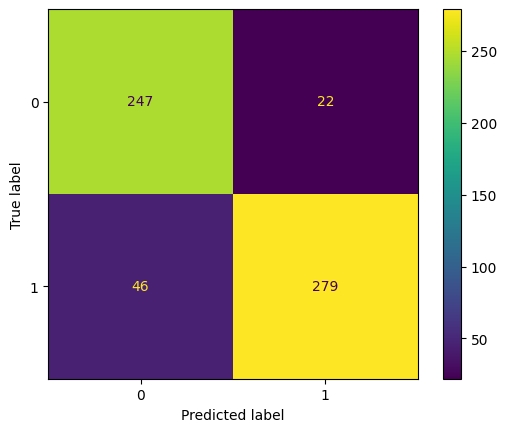

In [90]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

**Class Probabilities**  
We can obtain class probabilities from an XGBoost model.  These can help us use different thresholds for cutoff and decide on the error rates we are comfortable with. 


In [91]:
model_xgb.classes_

array([0, 1])

In [92]:
y_test

2692    1
936     0
1893    0
2368    1
1512    1
       ..
81      1
1103    0
232     1
603     1
1507    1
Name: PlacedOrNot, Length: 594, dtype: int64

In [93]:
pred_prob = model_xgb.predict_proba(X_test).round(3)
pred_prob

array([[0.001, 0.999],
       [0.951, 0.049],
       [0.778, 0.222],
       ...,
       [0.001, 0.999],
       [0.   , 1.   ],
       [0.   , 1.   ]], dtype=float32)

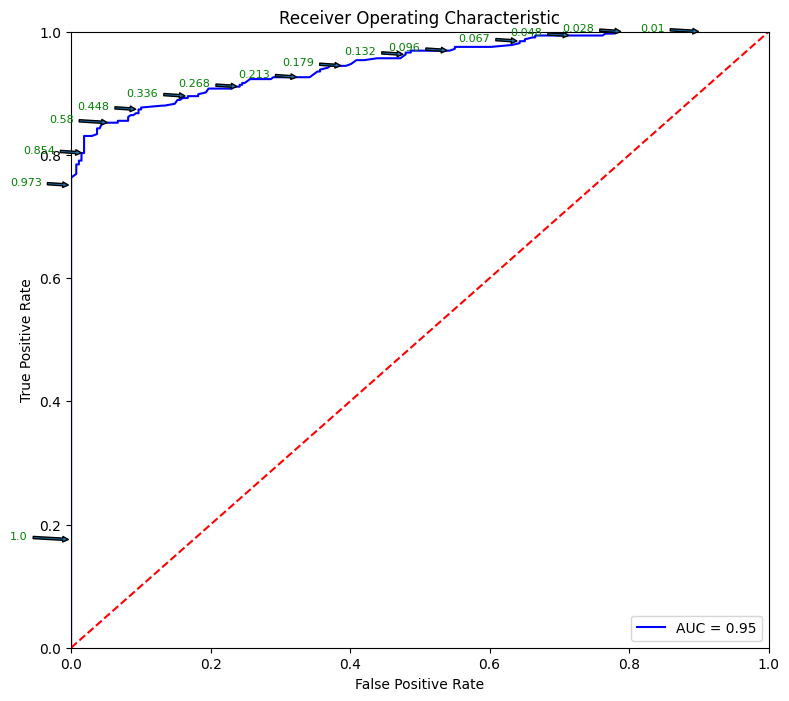

fpr  tpr  threshold
149  1.000000  1.0      0.000
148  0.985130  1.0      0.001
147  0.966543  1.0      0.002
146  0.962825  1.0      0.003
145  0.947955  1.0      0.004

In [94]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    if i in np.arange(1, len(thresholds), 10): # print every 10th point to prevent overplotting:
        plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                     xytext=(-44, 0), textcoords='offset points',
                     arrowprops={'arrowstyle':"simple"}, color='green',fontsize=8)
plt.show()

threshold_dataframe = pd.DataFrame({'fpr':fpr, 'tpr': tpr, 'threshold':thresholds}).sort_values(by='threshold')
threshold_dataframe.head()

### Change results by varying threshold

In [95]:
# Look at how the probabilities look for the first 10 observations
# The first column is class 0, and the second column is class 1

model_xgb.predict_proba(X_test)[:10]

array([[7.6830387e-04, 9.9923170e-01],
       [9.5129275e-01, 4.8707273e-02],
       [7.7790999e-01, 2.2209001e-01],
       [1.0061860e-03, 9.9899381e-01],
       [7.2269863e-01, 2.7730137e-01],
       [9.0646344e-01, 9.3536563e-02],
       [9.3053299e-01, 6.9467008e-02],
       [9.9859858e-01, 1.4014195e-03],
       [5.1414967e-04, 9.9948585e-01],
       [4.2480230e-04, 9.9957520e-01]], dtype=float32)

In [96]:
# Let us round the above as to make it a bit easier to read...
# same thing as prior cell, just presentation
np.round(model_xgb.predict_proba(X_test)[:10], 3)

array([[0.001, 0.999],
       [0.951, 0.049],
       [0.778, 0.222],
       [0.001, 0.999],
       [0.723, 0.277],
       [0.906, 0.094],
       [0.931, 0.069],
       [0.999, 0.001],
       [0.001, 0.999],
       [0.   , 1.   ]], dtype=float32)

In [97]:
# Now see what the actual prediction is for the first 10 items
# You can see the model has picked the most probable item
# for identifying which category it should be assigned.
#
# We can vary the threshold to change the predictions.
# We do this next

model_xgb.predict(X_test)[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

Confusion Matrix : 
 [[266   3]
 [ 68 257]]
Test accuracy =  0.8804713804713805
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       269
           1       0.99      0.79      0.88       325

    accuracy                           0.88       594
   macro avg       0.89      0.89      0.88       594
weighted avg       0.90      0.88      0.88       594



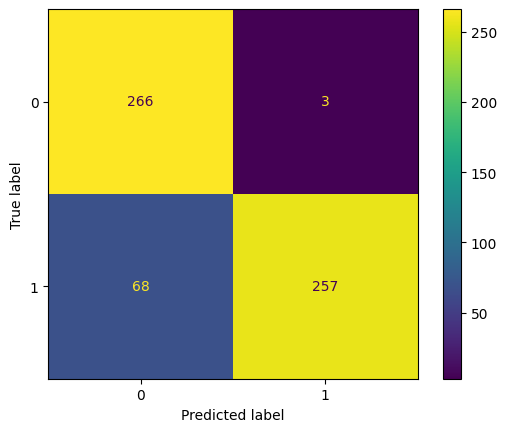

In [98]:
# Set threshold for identifying class 1
threshold = 0.9

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred,))

**Feature Importance**  
Using the method feature_importances_, we can get a sense for what the model considers more important than others.  However, feature importance identified in this way should be reviewed in the context of domain knowledge.  Refer article at https://explained.ai/rf-importance/  


In [99]:
# Check feature importance
# This can be misleading though - check out https://explained.ai/rf-importance/
importance = model_xgb.feature_importances_
pd.DataFrame({'Feature':feature_names, 'Importance':importance}).sort_values(by='Importance', ascending=False)

Feature  Importance
2                                   CGPA    0.556119
1                            Internships    0.085837
9                      Stream_Electrical    0.068963
0                                    Age    0.058088
7                           Stream_Civil    0.050928
12                     Stream_Mechanical    0.039562
4                      HistoryOfBacklogs    0.036199
10  Stream_Electronics And Communication    0.028353
8                Stream_Computer Science    0.022068
11         Stream_Information Technology    0.020170
3                                 Hostel    0.019541
5                          Gender_Female    0.014173
6                            Gender_Male    0.000000

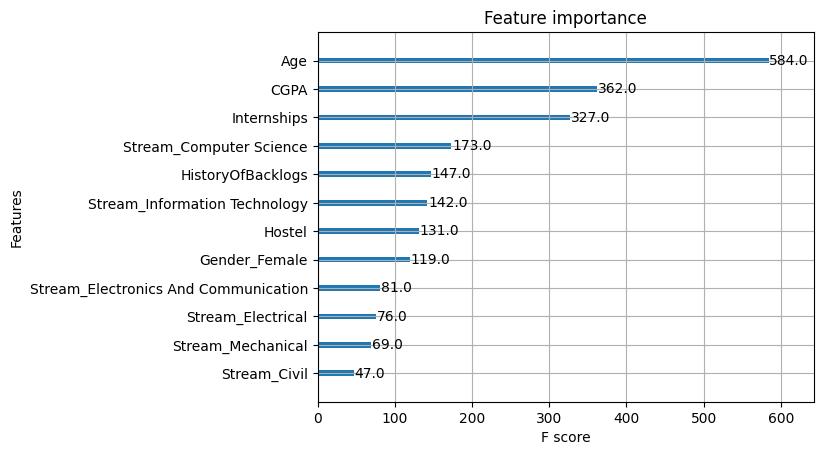

In [100]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model_xgb)

plt.show()

### XGBoost for Regression  
Let us try to predict diamond prices again, this time using XGBoost.  As we can see below, RMSE is half of what we had with Random Forest.

In [101]:
# Load data

diamonds = sns.load_dataset("diamonds")

In [102]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [103]:
# Get dummy variables

diamonds = pd.get_dummies(diamonds)

In [104]:
diamonds.head()

carat  depth  table  price     x     y     z  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43       True        False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31      False         True   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      False        False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63      False         True   
4   0.31   63.3   58.0    335  4.34  4.35  2.75      False        False   

   cut_Very Good  ...  color_I  color_J  clarity_IF  clarity_VVS1  \
0          False  ...    False    False       False         False   
1          False  ...    False    False       False         False   
2          False  ...    False    False       False         False   
3          False  ...     True    False       False         False   
4          False  ...    False     True       False         False   

   clarity_VVS2  clarity_VS1  clarity_VS2  clarity_SI1  clarity_SI2  \
0         False        False        False        False         True   
1         False        False        False         True        False   
2         False         True        False        False        False   
3         False        False         True        False        False   
4         False        False        False        False         True   

   clarity_I1  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 27 columns]

In [105]:
# Define X and y as arrays. y is the price column, X is everything else

X = diamonds.loc[:, diamonds.columns != 'price'].values
y = diamonds.price.values

In [106]:
# Define X and y as arrays. y is the price column, X is everything else

X = diamonds.loc[:, diamonds.columns != 'price']
y = diamonds.price

In [107]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [108]:
# Fit model

from xgboost import XGBRegressor

model_xgb_regr = XGBRegressor()
model_xgb_regr.fit(X_train, y_train)
model_xgb_regr.predict(X_test)

array([2362.096 , 1580.3359, 1980.5487, ...,  887.7716, 1783.2539,
       6301.7188], dtype=float32)

In [109]:
# Evaluate model

y_pred  =  model_xgb_regr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  310454.5366190797
RMSE =  557.1844727009895
MAE =  283.5860505116441


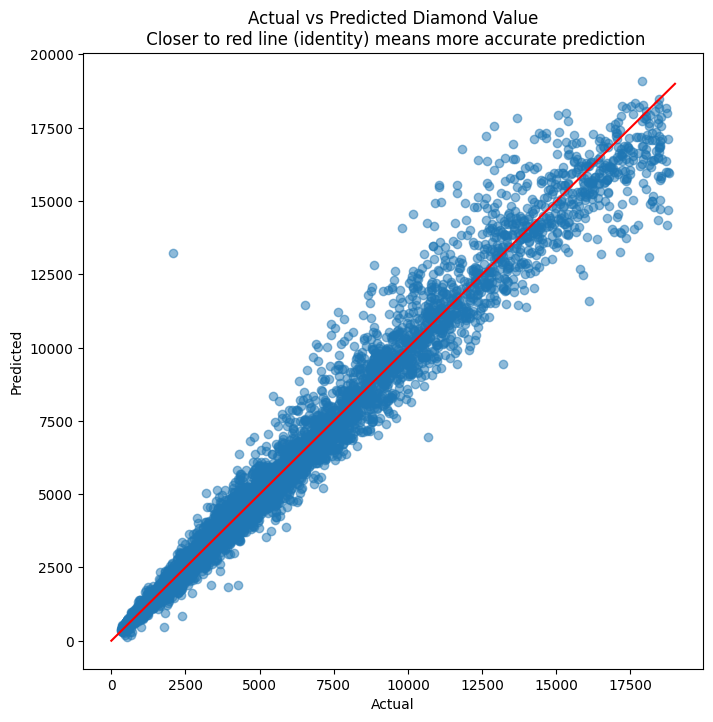

In [110]:
# Evaluate residuals

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Diamond Value\n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,19000],[0,19000], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [111]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

actual  predicted
actual     1.000000   0.980364
predicted  0.980364   1.000000

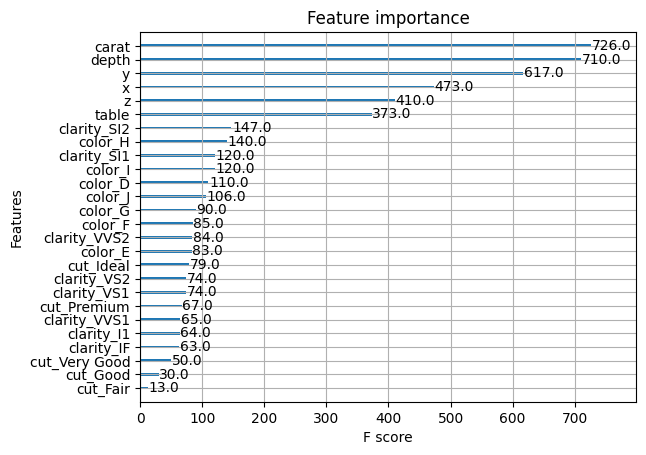

In [112]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model_xgb_regr);

As we can see, XGBoost has vastly improved the prediction results.  R-squared is 0.98, and the residual plot looks much better than with Random Forest.


In [113]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## Linear Methods
Linear methods are different from tree based methods that we looked at earlier.  They approach the problem from the perspective of plotting the points and drawing a line (or a plane) that separates the categories.  

Let us consider a toy dataset that we create at random.  The dataset has two features (Feature_1 and Feature_2), that help us distinguish between two classes - 0 and 1.

The data is graphed in the scatterplot below.  The point to note here is that it is pretty easy to distinguish between the two classes by drawing a straight line between the two classes.  The question though is which line is the best possible line for classification, given an infinite number of such lines can be drawn?



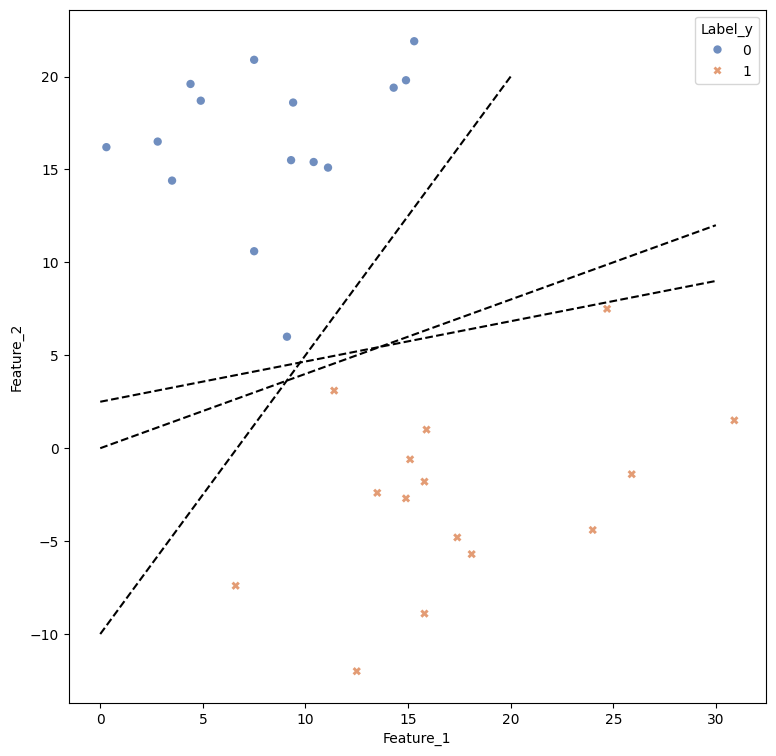

In [114]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification


# Generate random data
X, y, centers = make_blobs(n_samples=30, centers=2,
                           n_features=2, random_state=14,
                           return_centers=True,
                           center_box=(0,20), cluster_std = 5)

# Round to one place of decimal

X = np.round_(X,1)
y = np.round_(y,1)

# Create a dataframe with the features and the y variable

df = pd.DataFrame(dict(Feature_1=X[:,0], Feature_2=X[:,1], Label_y=y))
df = round(df,ndigits=2)


# Plot the data

plt.figure(figsize=(9,9))
sns.scatterplot(data = df, x = 'Feature_1', y = 'Feature_2', style = 'Label_y', hue = 'Label_y', 
                alpha = .8, palette="deep",edgecolor = 'None')

# Plot possible lines to discriminate between classes

plt.plot([0,30],[2.5,9], 'k--')
plt.plot([0,30], [0,12], 'k--')
plt.plot([0,20], [-10,20], 'k--');

If we were to create a decision tree, the problem is solved as the decision tree draws two straight line boundaries - first at Feature_2 > 4.55, and the second at Feature_1 > 20.  While this works for the current data, we can obviously see that a more robust and simpler solution would be to draw a straight line between the data that is at an angle separating the two classes.

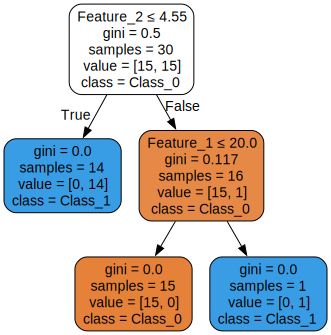

In [115]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
# iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['Feature_1', 'Feature_2'],  
                         class_names=['Class_0', 'Class_1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

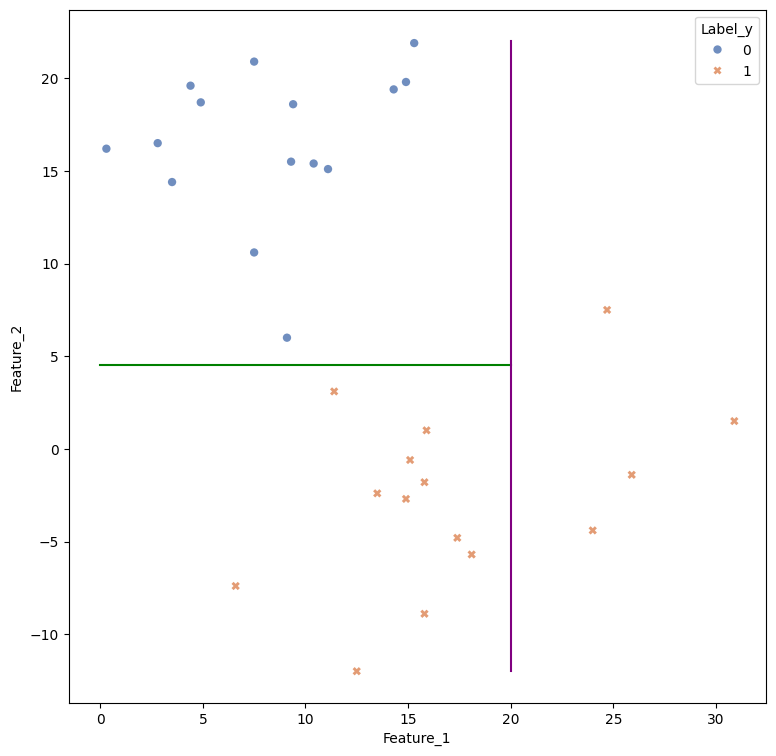

In [116]:
# Plot the data

plt.figure(figsize=(9,9))
sns.scatterplot(data = df, x = 'Feature_1', y = 'Feature_2', style = 'Label_y', hue = 'Label_y', 
                alpha = .8, palette="deep",edgecolor = 'None')

# Plot possible lines to discriminate between classes

plt.plot([0,20],[4.55,4.55], color='green')
plt.plot([20,20], [-12,22], color = 'purple');


However, we can see that a single linear split provides better results.  

This is an example of a Linear Classifier.  The decision boundary is essentially a line represented as the weighted sum of the two axes.  This is called a linear discriminant because it discriminates between the two classes using a linear combination of the independent attributes.  

A general linear model would look as follows:  

$f(x) = w_0 + w_1 x_1 + w_2 x_2+ ...$

 For our example, the linear classifier line is defined by the following example:  

$[\mbox{Constant Intercept}] + [\mbox{Coefficient 1} * \mbox{Feature2}] + [\mbox{Coefficient 2} * \mbox{Feature2}] = 0$

The coefficients, or weights, are often loosely interpreted as the importance of the features, assuming all feature values have been normalized.  

**The question is: How do we identify the correct line as many different lines are possible.**  

There are many methods to determine the line that serves as our linear discriminant.  Each method differs in the ‘objective function’ that is optimized to arrive at the solution.  

Two of the common methods used are:  
 - Linear Discriminant Analysis, and 
 - Support Vector Machines  




In [117]:
# Fit linear model
from sklearn.svm import SVC
model_svc = SVC(kernel="linear")
model_svc.fit(X, y)

SVC(kernel='linear')

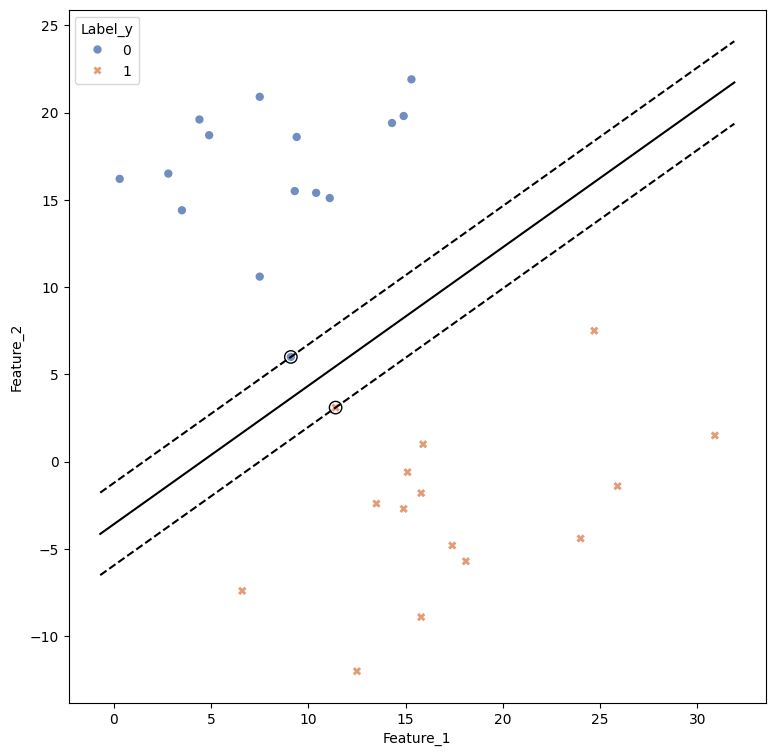

In [118]:
# Plot the data, and line dividing the classification

plt.figure(figsize=(9,9))
sns.scatterplot(data = df, x = 'Feature_1', y = 'Feature_2', style = 'Label_y', hue = 'Label_y', 
                alpha = .8, palette="deep",edgecolor = 'None');



# Plot the equation of the linear discriminant

w = model_svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(df.Feature_1.min()-1, df.Feature_1.max()+1)
yy = a * xx - (model_svc.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

# Identify the support vectors, ie the points that decide the decision boundary

plt.scatter(
    model_svc.support_vectors_[:, 0],
    model_svc.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
   )

# Plot the margin lines

margin = 1 / np.sqrt(np.sum(model_svc.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--");

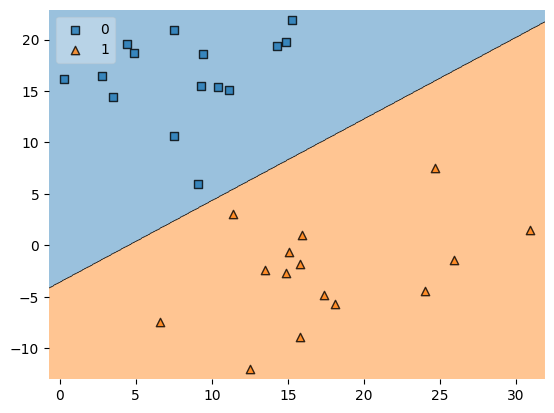

In [119]:
# Another way to plot the decision boundary for SVM models
# Source: https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

svm_graph = SVC(kernel='linear')
svm_graph.fit(X, y)
plot_decision_regions(X, y, clf=svm_graph, legend=2)
plt.show()

### Linear Discriminant Analysis  
LDA assumes a normal distribution for the data points for the different categories, and attempts to create a 1D projection in a way that separates classes well.  


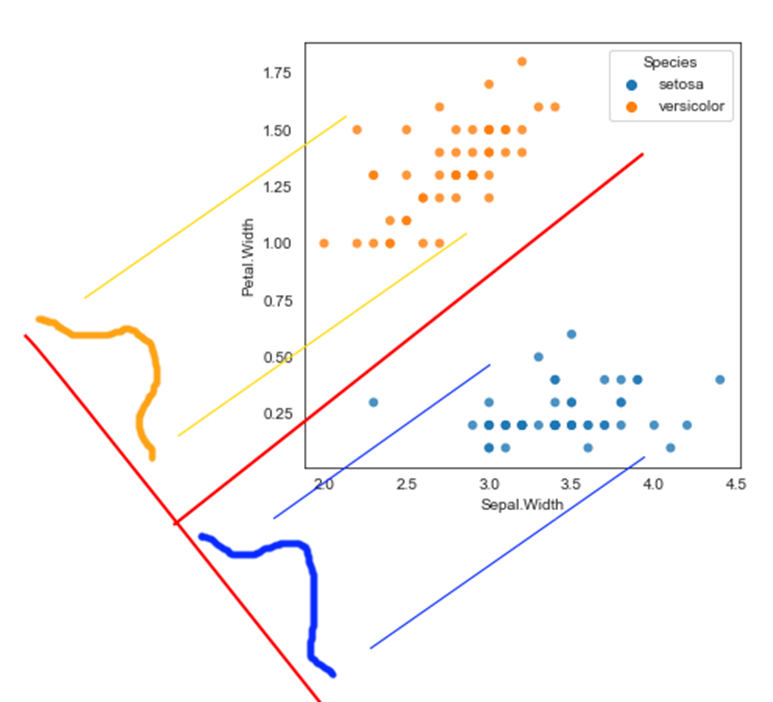  

Fortunately, there are libraries available that do all the tough math for us.  

LDA expects predictor variables to be continuous due to its distributional assumption of independent variables being multivariate normal.  This limits its use in situations where the predictor variables are categorical.  

You do not need to standardize the feature set prior to using linear discriminant analysis.
You should rule out logistic regression as a better alternative before using linear discriminant analysis.


**LDA in Action**  

We revisit the collegePlace.csv data.

About the data:  
A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.  

Data Fields:  
 - Age: Age At The Time Of Final Year
 - Gender: Gender Of Candidate
 - Stream: Engineering Stream That The Candidate Belongs To
 - Internships: Number Of Internships Undertaken During The Course Of Studies, Not Necessarily Related To College Studies Or Stream
 - CGPA: CGPA Till 6th Semester
 - Hostel: Whether Student Lives In College Accomodation
 - HistoryOfBacklogs: Whether Student Ever Had Any Backlogs In Any Subjects
 - PlacedOrNot: Target Variable


In [120]:
# load the data

college = pd.read_csv('collegePlace.csv')

In [121]:
college

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0                     1            1  
1                     1            1  
2                     0            1  
3                     1            1  
4                     0            1  
...                 ...          ...  
2961                  0            0  
2962                  0            0  
2963                  0            0  
2964                  0            0  
2965                  0            1  

[2966 rows x 8 columns]

In [122]:
college.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [123]:
# divide the dataset into train and test sets, separating the features and target variable
X = college[['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']].values
y = college['PlacedOrNot'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
# apply Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
model_lda = LDA.fit(X = X_train, y = y_train)
pred = model_lda.predict(X_test)

In [125]:
college.PlacedOrNot.value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

In [126]:
1639/(1639+1327)

0.552596089008766

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       282
           1       0.78      0.77      0.77       312

    accuracy                           0.76       594
   macro avg       0.76      0.76      0.76       594
weighted avg       0.76      0.76      0.76       594



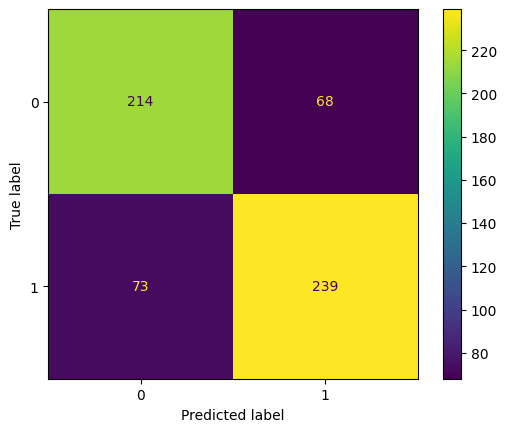

In [127]:
# evaluate performance

ConfusionMatrixDisplay.from_estimator(model_lda, X_test, y_test);
print(classification_report(y_true = y_test, y_pred = pred))

In [128]:
confusion_matrix(y_true = y_test, y_pred = pred)

array([[214,  68],
       [ 73, 239]], dtype=int64)

In [129]:
# Get predictions

model_lda.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [130]:
# Get probability of class membership 

pred_prob = model_lda.predict_proba(X_test)
pred_prob

array([[0.33667225, 0.66332775],
       [0.98912472, 0.01087528],
       [0.33667225, 0.66332775],
       ...,
       [0.74769385, 0.25230615],
       [0.92225565, 0.07774435],
       [0.25127118, 0.74872882]])

In [131]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,

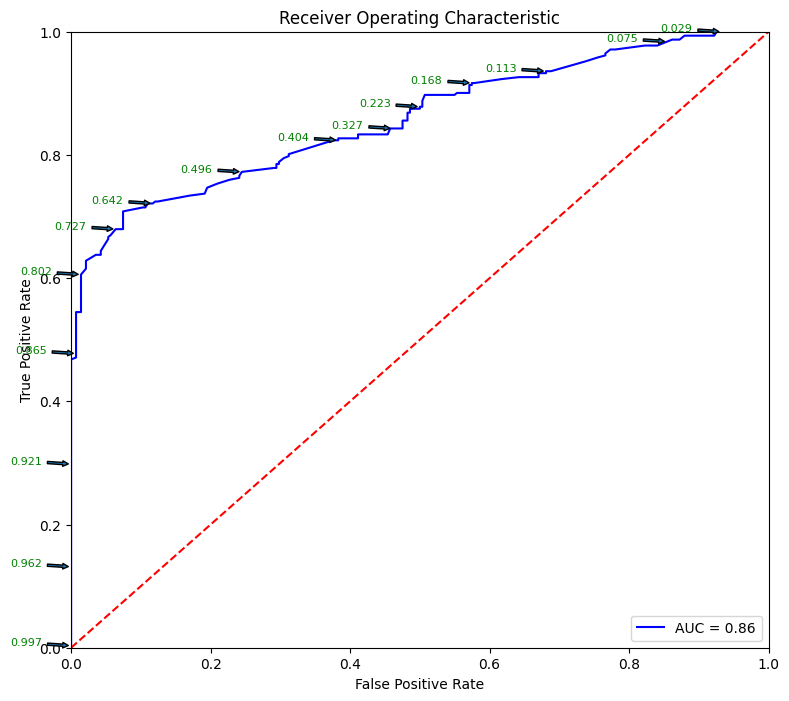

fpr  tpr  threshold
149  1.000000  1.0   0.005696
148  0.992908  1.0   0.008067
147  0.982270  1.0   0.009926
146  0.968085  1.0   0.011577
145  0.964539  1.0   0.014646

In [132]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    if i in np.arange(1, len(thresholds), 10): # print every 10th point to prevent overplotting:
        plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                     xytext=(-44, 0), textcoords='offset points',
                     arrowprops={'arrowstyle':"simple"}, color='green',fontsize=8)
plt.show()

threshold_dataframe = pd.DataFrame({'fpr':fpr, 'tpr': tpr, 'threshold':thresholds}).sort_values(by='threshold')
threshold_dataframe.head()

**Closing remarks on LDA:**
 - LDA can not be applied to regression problems, it is useful only for classification.
 - LDA does provide class membership probabilities, using the predict_proba() method.
 - There are additional variations to LDA, eg Quadratic Discriminant Analysis, and those may yield better results by allowing a non-linear decision boundary.


## Support Vector Machines 

### Classification with SVM

SVMs use linear classification techniques, ie, they classify instances based on a linear function of the features.  The idea behind SVMs is simple: instead of thinking about separating with a line, fit the fattest possible bar between the two classes.  

The objective function for SVM incorporates the idea that a wider bar is better.  

Once the widest bar is found, the linear discriminant will be the center line through the bar.  

The distance between the dashed parallel lines is called the margin around the linear discriminant, and the objective function attempts to maximize the margin.  

SVMs require data to be standardized for best results  



**SVM Example**  

We will use the same data as before – collegePlace.csv.  However this time we will include all the variables, including the categorical variables.
We convert the categorical variables to numerical using dummy variables with pd.get_dummies().


In [133]:
# load the data & convert categoricals into numerical variables
college = pd.read_csv('collegePlace.csv')

college = pd.get_dummies(college)
college

Age  Internships  CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot  \
0      22            1     8       1                  1            1   
1      21            0     7       1                  1            1   
2      22            1     6       0                  0            1   
3      21            0     8       0                  1            1   
4      22            0     8       1                  0            1   
...   ...          ...   ...     ...                ...          ...   
2961   23            0     7       0                  0            0   
2962   23            1     7       1                  0            0   
2963   22            1     7       0                  0            0   
2964   22            1     7       0                  0            0   
2965   23            0     8       0                  0            1   

      Gender_Female  Gender_Male  Stream_Civil  Stream_Computer Science  \
0             False         True         False                    False   
1              True        False         False                     True   
2              True        False         False                    False   
3             False         True         False                    False   
4             False         True         False                    False   
...             ...          ...           ...                      ...   
2961          False         True         False                    False   
2962          False         True         False                    False   
2963          False         True         False                    False   
2964          False         True         False                     True   
2965          False         True          True                    False   

      Stream_Electrical  Stream_Electronics And Communication  \
0                 False                                  True   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
2961              False                                 False   
2962              False                                 False   
2963              False                                 False   
2964              False                                 False   
2965              False                                 False   

      Stream_Information Technology  Stream_Mechanical  
0                             False              False  
1                             False              False  
2                              True              False  
3                              True              False  
4                             False               True  
...                             ...                ...  
2961                           True              False  
2962                          False               True  
2963                           True              False  
2964                          False              False  
2965                          False              False  

[2966 rows x 14 columns]

At this point, fitting a simple SVM SVC (Support Vector Classification) model is trivial.  Refer code below.  

SVM has several variations, including LinearSVC, SVC with Polynomial, etc, refer documentation at https://scikit-learn.org/stable/modules/svm.html.  

Note that we have chosen to pre-process and standardize the input data first.  


In [134]:
# divide the dataset into train and test sets, separating the features and target variable
X = college.drop(['PlacedOrNot'], axis=1).values
y = college['PlacedOrNot'].values

scale = preproc.StandardScaler().fit(X)
X = scale.transform(X)
# X = preproc.StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
# fit the model
clf = SVC(probability=True) # setting probability=True here can allow us to get probabilities later
model_svm = clf.fit(X_train, y_train)
pred = model_svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       238
           1       0.93      0.80      0.86       356

    accuracy                           0.85       594
   macro avg       0.84      0.86      0.84       594
weighted avg       0.86      0.85      0.85       594



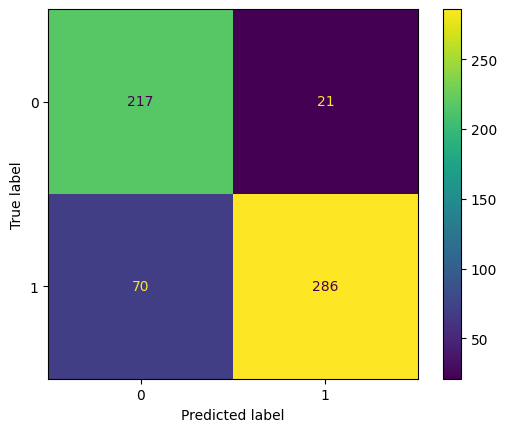

In [136]:
# evaluate performance
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test);
print(classification_report(y_true = y_test, y_pred = pred))

In [137]:
pred_prob = model_svm.predict_proba(X_test)
pred_prob

array([[0.09899112, 0.90100888],
       [0.75461605, 0.24538395],
       [0.31053531, 0.68946469],
       ...,
       [0.87431315, 0.12568685],
       [0.09960347, 0.90039653],
       [0.95752983, 0.04247017]])

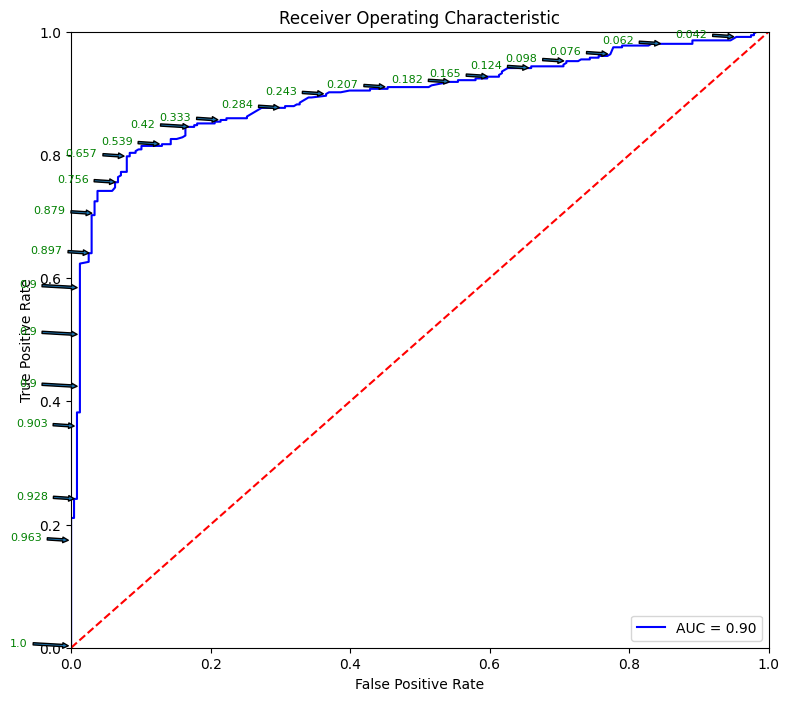

fpr       tpr  threshold
238  1.000000  1.000000   0.025748
237  0.983193  1.000000   0.028908
236  0.978992  0.997191   0.032533
235  0.978992  0.994382   0.034001
234  0.974790  0.994382   0.037002

In [138]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    if i in np.arange(1, len(thresholds), 10): # print every 10th point to prevent overplotting:
        plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                     xytext=(-44, 0), textcoords='offset points',
                     arrowprops={'arrowstyle':"simple"}, color='green',fontsize=8)
plt.show()

threshold_dataframe = pd.DataFrame({'fpr':fpr, 'tpr': tpr, 'threshold':thresholds}).sort_values(by='threshold')
threshold_dataframe.head()

SVMs can predict class probabilities, if probability calculations have been set to True as part of the model fitting process.  However, these are not calculated by default by the sklearn algorithm.  

SVMs can also be used for regression problems, using the model type SVR (‘R’ standing for regression), which we examine next.  


### Regression with SVM

We perform regression using `SVR` from sklearn. 

In [139]:
# Load the data

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = housing['data']
y = housing['target']
features = housing['feature_names']
DESCR = housing['DESCR']

cali_df = pd.DataFrame(X, columns = features)
cali_df.insert(0,'medv', y)

In [140]:
cali_df

medv  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1      3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2      3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3      3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4      3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467   
...      ...     ...       ...       ...        ...         ...       ...   
20635  0.781  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636  0.771  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637  0.923  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  0.847  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639  0.894  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1         37.86    -122.22  
2         37.85    -122.24  
3         37.85    -122.25  
4         37.85    -122.25  
...         ...        ...  
20635     39.48    -121.09  
20636     39.49    -121.21  
20637     39.43    -121.22  
20638     39.43    -121.32  
20639     39.37    -121.24  

[20640 rows x 9 columns]

In [141]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [142]:
# Fit model

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_svr = make_pipeline(StandardScaler(), SVR())
model_svr.fit(X, y)
model_svr = model_svr.fit(X_train, y_train)
model_svr.predict(X_test)

array([2.25616175, 1.54186621, 1.17066138, ..., 2.9945613 , 3.19107363,
       2.17443122])

In [143]:
# Evaluate model

y_pred  =  model_svr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  0.34575758344108304
RMSE =  0.5880115504316926
MAE =  0.39452720836467375


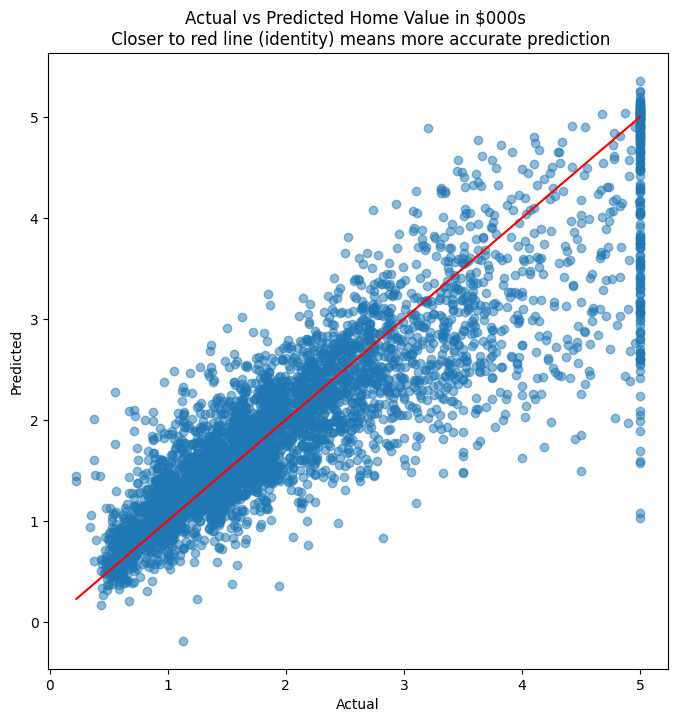

In [144]:
# Look at residuals

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red \
line (identity) means more accurate prediction')
plt.plot( [y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: medv, dtype: float64


<Axes: ylabel='Frequency'>

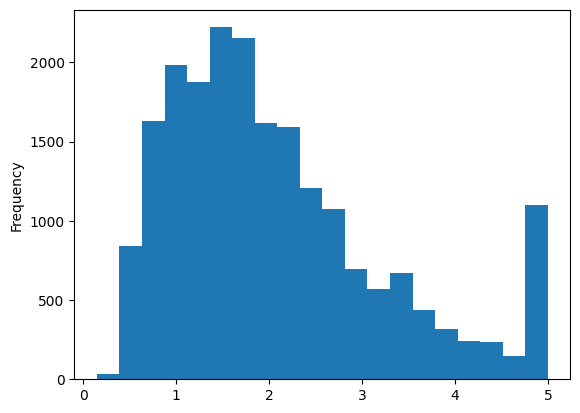

In [145]:
print(cali_df.medv.describe())
cali_df.medv.plot.hist(bins=20)

## Naive Bayes

Essentially, the logic behind Naive Bayes is as follows: Instead of taking the absolute probability of something happening, we look at the probability of something happening given other things we know have already happened.  

So the probability of a flood in the next 1 week may be say 0.1%, but this probability would be different if we already know that 6 inches of rain has already fallen in the past 24 hours.  

For each of the categories to be predicted, Naive Bayes considers the conditional probability given the values of other independent variables.  

Naïve Bayes uses categorical predictors.  For continuous predictors, it assumes a distribution with a mean and standard deviation, which are used to calculate probabilities used in the algorithm.
We do not need to standardize the feature set before using Naïve Bayes.  


In [146]:
from sklearn import datasets

X = datasets.load_wine()['data']
y = datasets.load_wine()['target']
features = datasets.load_wine()['feature_names']
DESCR = datasets.load_wine()['DESCR']
classes = datasets.load_wine()['target_names']

wine_df = pd.DataFrame(X, columns = features)
wine_df.insert(0,'class', y)

In [147]:
wine_df

class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0        0    14.23        1.71  2.43               15.6      127.0   
1        0    13.20        1.78  2.14               11.2      100.0   
2        0    13.16        2.36  2.67               18.6      101.0   
3        0    14.37        1.95  2.50               16.8      113.0   
4        0    13.24        2.59  2.87               21.0      118.0   
..     ...      ...         ...   ...                ...        ...   
173      2    13.71        5.65  2.45               20.5       95.0   
174      2    13.40        3.91  2.48               23.0      102.0   
175      2    13.27        4.28  2.26               20.0      120.0   
176      2    13.17        2.59  2.37               20.0      120.0   
177      2    14.13        4.10  2.74               24.5       96.0   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     color_intensity   hue  od280/od315_of_diluted_wines  proline  
0               5.64  1.04                          3.92   1065.0  
1               4.38  1.05                          3.40   1050.0  
2               5.68  1.03                          3.17   1185.0  
3               7.80  0.86                          3.45   1480.0  
4               4.32  1.04                          2.93    735.0  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74    740.0  
174             7.30  0.70                          1.56    750.0  
175            10.20  0.59                          1.56    835.0  
176             9.30  0.60                          1.62    840.0  
177             9.20  0.61                          1.60    560.0  

[178 rows x 14 columns]

In [148]:
# Let us look at the distribution of the observations across classes
wine_df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [149]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=123)

In [150]:
# Fit a NB model, and predict
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred = model_nb.predict(X_test)

In [151]:
# Evaluate the model accuracy
y_pred  =  model_nb.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



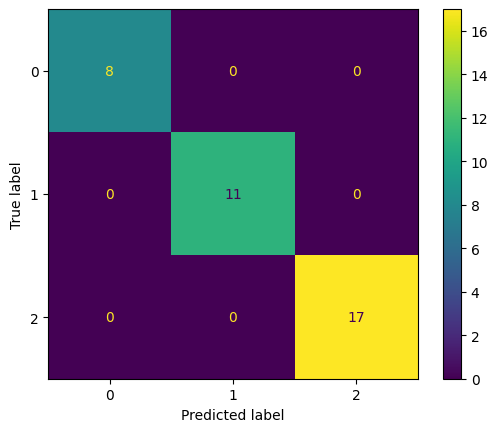

In [152]:
# Model evaluation using the classification report and the confusion matrix

ConfusionMatrixDisplay.from_estimator(model_nb, X_test, y_test);
print(classification_report(y_true = y_test, y_pred = pred))


In [153]:
wine_df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [154]:
model_nb.classes_

array([0, 1, 2])

In [155]:
model_nb.predict_proba(X_test)

array([[5.93957711e-24, 6.55944182e-07, 9.99999344e-01],
       [1.17999186e-18, 9.99998706e-01, 1.29386818e-06],
       [1.28963191e-29, 2.29833079e-06, 9.99997702e-01],
       [4.24204725e-14, 9.99995948e-01, 4.05248392e-06],
       [1.11923629e-15, 9.99999937e-01, 6.32987582e-08],
       [4.45783147e-18, 3.45360852e-18, 1.00000000e+00],
       [9.96369215e-01, 3.63078524e-03, 1.41680626e-18],
       [8.63917919e-31, 1.78055017e-06, 9.99998219e-01],
       [1.32009669e-20, 1.51909745e-18, 1.00000000e+00],
       [5.37112173e-07, 9.99999463e-01, 6.89392222e-24],
       [2.30365630e-25, 1.06216462e-08, 9.99999989e-01],
       [1.91497199e-16, 4.50596573e-04, 9.99549403e-01],
       [5.09908113e-24, 4.58569400e-16, 1.00000000e+00],
       [9.99999633e-01, 3.66916909e-07, 1.18786467e-29],
       [1.00000000e+00, 1.68595020e-15, 7.56482058e-39],
       [9.82033272e-15, 2.78899850e-05, 9.99972110e-01],
       [3.32691011e-13, 1.00000000e+00, 1.16501960e-15],
       [1.17131670e-10, 1.00000

## k-Nearest Neighbors

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data.
Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.  

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors.  

Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights parameter (weights = 'uniform’, or weights = 'distance’).   

kNN is an easy to use, intuitive algorithm.   

kNN requires variables to be normalized or scaled, else distance calculations can be skewed by numerically large features.  

kNN can be used to predict categories as well as continuous variables.  

### kNN classifier

**Example**  
Let us consider our college placement dataset again.  We load the data, and perform a train-test split.  We also standard-scale the data $((x - mean)/stdev)$. 


In [156]:
# load the data
college = pd.read_csv('collegePlace.csv')
college = pd.get_dummies(college)

In [157]:
college

Age  Internships  CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot  \
0      22            1     8       1                  1            1   
1      21            0     7       1                  1            1   
2      22            1     6       0                  0            1   
3      21            0     8       0                  1            1   
4      22            0     8       1                  0            1   
...   ...          ...   ...     ...                ...          ...   
2961   23            0     7       0                  0            0   
2962   23            1     7       1                  0            0   
2963   22            1     7       0                  0            0   
2964   22            1     7       0                  0            0   
2965   23            0     8       0                  0            1   

      Gender_Female  Gender_Male  Stream_Civil  Stream_Computer Science  \
0             False         True         False                    False   
1              True        False         False                     True   
2              True        False         False                    False   
3             False         True         False                    False   
4             False         True         False                    False   
...             ...          ...           ...                      ...   
2961          False         True         False                    False   
2962          False         True         False                    False   
2963          False         True         False                    False   
2964          False         True         False                     True   
2965          False         True          True                    False   

      Stream_Electrical  Stream_Electronics And Communication  \
0                 False                                  True   
1                 False                                 False   
2                 False                                 False   
3                 False                                 False   
4                 False                                 False   
...                 ...                                   ...   
2961              False                                 False   
2962              False                                 False   
2963              False                                 False   
2964              False                                 False   
2965              False                                 False   

      Stream_Information Technology  Stream_Mechanical  
0                             False              False  
1                             False              False  
2                              True              False  
3                              True              False  
4                             False               True  
...                             ...                ...  
2961                           True              False  
2962                          False               True  
2963                           True              False  
2964                          False              False  
2965                          False              False  

[2966 rows x 14 columns]

In [158]:
# Test train split

X = college.loc[:, college.columns != 'PlacedOrNot'].values
X = preproc.StandardScaler().fit_transform(X) 
y = college['PlacedOrNot'].values
feature_names = college.loc[:, college.columns != 'PlacedOrNot'].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [159]:
pd.DataFrame(X, columns = college.loc[:, college.columns != 'PlacedOrNot'].columns).describe()

Age   Internships          CGPA        Hostel  \
count  2.966000e+03  2.966000e+03  2.966000e+03  2.966000e+03   
mean  -1.073241e-15  7.666004e-17  2.443539e-16  3.293986e-17   
std    1.000169e+00  1.000169e+00  1.000169e+00  1.000169e+00   
min   -1.876516e+00 -9.507732e-01 -2.143313e+00 -6.066969e-01   
25%   -3.667516e-01 -9.507732e-01 -1.109812e+00 -6.066969e-01   
50%   -3.667516e-01  4.004454e-01 -7.631043e-02 -6.066969e-01   
75%    3.881306e-01  4.004454e-01  9.571907e-01  1.648269e+00   
max    6.427188e+00  3.102883e+00  1.990692e+00  1.648269e+00   

       HistoryOfBacklogs  Gender_Female   Gender_Male  Stream_Civil  \
count       2.966000e+03   2.966000e+03  2.966000e+03  2.966000e+03   
mean       -4.551690e-17   1.916501e-17 -1.916501e-17 -1.676938e-17   
std         1.000169e+00   1.000169e+00  1.000169e+00  1.000169e+00   
min        -4.877463e-01  -4.454030e-01 -2.245158e+00 -3.459303e-01   
25%        -4.877463e-01  -4.454030e-01  4.454030e-01 -3.459303e-01   
50%        -4.877463e-01  -4.454030e-01  4.454030e-01 -3.459303e-01   
75%        -4.877463e-01  -4.454030e-01  4.454030e-01 -3.459303e-01   
max         2.050246e+00   2.245158e+00  4.454030e-01  2.890755e+00   

       Stream_Computer Science  Stream_Electrical  \
count             2.966000e+03       2.966000e+03   
mean             -5.270378e-17       6.587972e-18   
std               1.000169e+00       1.000169e+00   
min              -5.952629e-01      -3.562298e-01   
25%              -5.952629e-01      -3.562298e-01   
50%              -5.952629e-01      -3.562298e-01   
75%               1.679930e+00      -3.562298e-01   
max               1.679930e+00       2.807176e+00   

       Stream_Electronics And Communication  Stream_Information Technology  \
count                          2.966000e+03                   2.966000e+03   
mean                          -2.395626e-17                   3.114314e-17   
std                            1.000169e+00                   1.000169e+00   
min                           -4.084089e-01                  -5.511227e-01   
25%                           -4.084089e-01                  -5.511227e-01   
50%                           -4.084089e-01                  -5.511227e-01   
75%                           -4.084089e-01                  -5.511227e-01   
max                            2.448527e+00                   1.814478e+00   

       Stream_Mechanical  
count       2.966000e+03  
mean       -3.114314e-17  
std         1.000169e+00  
min        -4.084089e-01  
25%        -4.084089e-01  
50%        -4.084089e-01  
75%        -4.084089e-01  
max         2.448527e+00

In [160]:
# Fit the model using 5 neighbors

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [161]:
# Perform predictions, and store the results in a variable called 'pred'

pred = model_knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       265
           1       0.87      0.85      0.86       329

    accuracy                           0.85       594
   macro avg       0.85      0.85      0.85       594
weighted avg       0.85      0.85      0.85       594



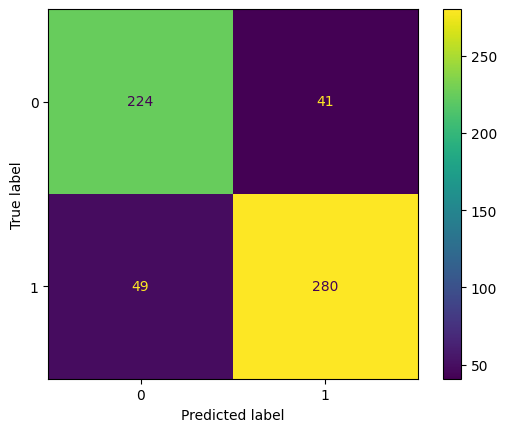

In [162]:
# Check the classification report and the confusion matrix

print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_knn, X_test, y_test);

In [163]:
pred_prob = model_knn.predict_proba(X_test).round(3)
pred_prob

array([[0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ]])

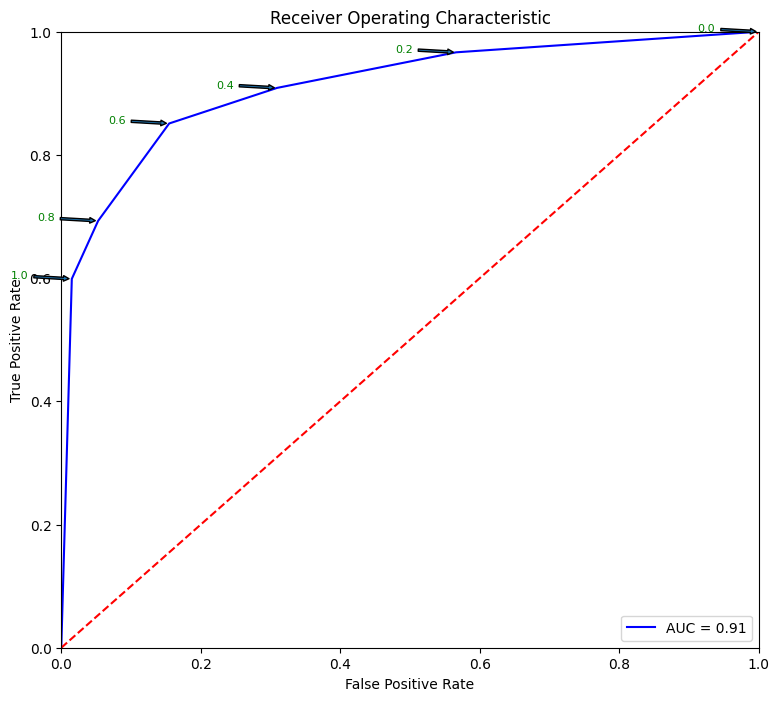

fpr       tpr  threshold
6  1.000000  1.000000        0.0
5  0.566038  0.966565        0.2
4  0.309434  0.908815        0.4
3  0.154717  0.851064        0.6
2  0.052830  0.693009        0.8

In [164]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    if i in np.arange(1, len(thresholds), 1): # print every n-th point to prevent overplotting:
        plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                     xytext=(-44, 0), textcoords='offset points',
                     arrowprops={'arrowstyle':"simple"}, color='green',fontsize=8)
plt.show()

threshold_dataframe = pd.DataFrame({'fpr':fpr, 'tpr': tpr, 'threshold':thresholds}).sort_values(by='threshold')
threshold_dataframe.head()

**What is the right number of neighbors to use?**  
We used 5 as the count of neighbors in the example above.  But how do we know that 5 is the correct number of neighbors?  The fact is, we don't know.  

So we can try several counts of number of neighbors to see what gives us the best result for the metric we are interested in.  Let us consider accuracy as the measure we are looking to improve.  We will build the model several times, each time with a different count of the number of neighbors, and calculate the accuracy each time.  


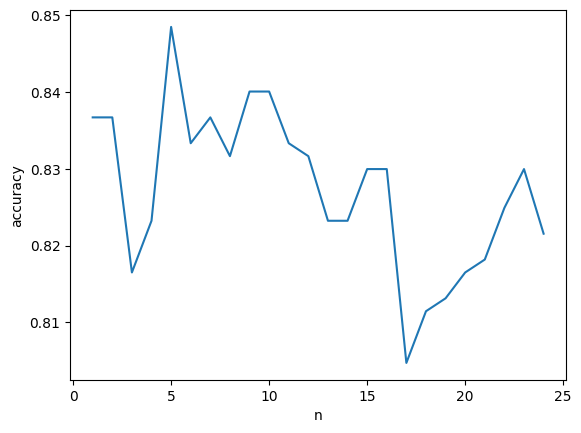

n  accuracy
4   5  0.848485
8   9  0.840067
9  10  0.840067
0   1  0.836700
6   7  0.836700

In [165]:
# Loop through n from 1 to 25 to find the best n  

acc = []
for n in range(1,25):
    model_knn = KNeighborsClassifier(n_neighbors=n)
    model_knn.fit(X_train, y_train)
    pred = model_knn.predict(X_test)
    acc.append([n, accuracy_score(y_test, pred)])
sns.lineplot(data = pd.DataFrame(acc, columns=['n','accuracy']), x = 'n', y = 'accuracy')
plt.show()
pd.DataFrame(acc, columns=['n','accuracy']).sort_values(by='accuracy', ascending=False).head()

### kNN Regressor

In [166]:
# Load data
diamonds = sns.load_dataset("diamonds")

In [167]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [168]:
# Get dummy variables
diamonds = pd.get_dummies(diamonds)

In [169]:
diamonds.head()

carat  depth  table  price     x     y     z  cut_Ideal  cut_Premium  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43       True        False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31      False         True   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      False        False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63      False         True   
4   0.31   63.3   58.0    335  4.34  4.35  2.75      False        False   

   cut_Very Good  ...  color_I  color_J  clarity_IF  clarity_VVS1  \
0          False  ...    False    False       False         False   
1          False  ...    False    False       False         False   
2          False  ...    False    False       False         False   
3          False  ...     True    False       False         False   
4          False  ...    False     True       False         False   

   clarity_VVS2  clarity_VS1  clarity_VS2  clarity_SI1  clarity_SI2  \
0         False        False        False        False         True   
1         False        False        False         True        False   
2         False         True        False        False        False   
3         False        False         True        False        False   
4         False        False        False        False         True   

   clarity_I1  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 27 columns]

In [170]:
# Define X and y as arrays. y is the price column, X is everything else
X = diamonds.loc[:, diamonds.columns != 'price'].values
X = preproc.StandardScaler().fit_transform(X) 
y = diamonds.price.values

In [171]:
X.shape

(53940, 26)

In [172]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [173]:
# Fit model
from sklearn.neighbors import KNeighborsRegressor
model_knn_regress = KNeighborsRegressor(n_neighbors=1)
model_knn_regress.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [174]:
# Evaluate model
y_pred  =  model_knn_regress.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  841907.646366333
RMSE =  917.5552552115502
MAE =  443.25871338524286


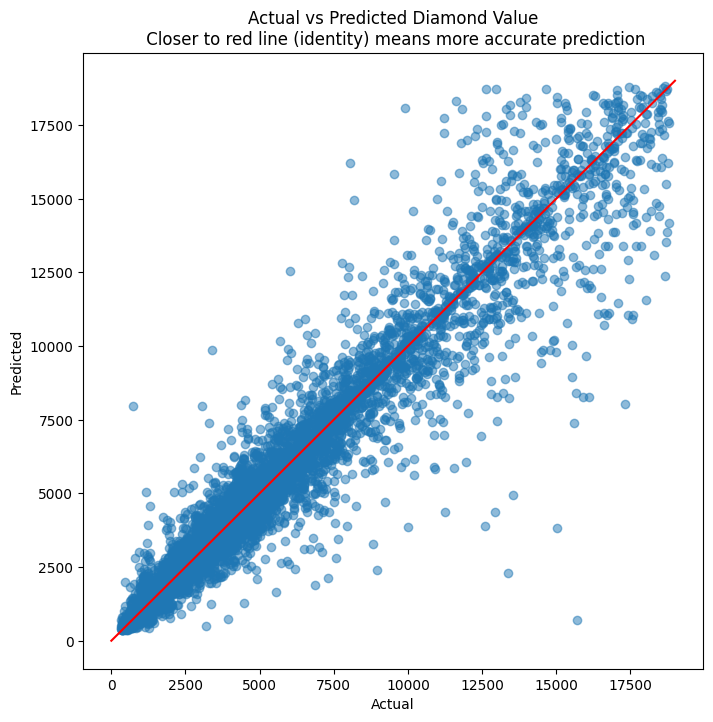

In [175]:
# Evaluate residuals
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Diamond Value\n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,19000],[0,19000], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [176]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

actual  predicted
actual     1.000000   0.945793
predicted  0.945793   1.000000

In [177]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## k-Means Clustering

k-means clustering is a non-hierarchical approach to clustering.  The goal is to divide the observations into a number of non-overlapping groups, or clusters, in a way that the clusters are as homogenous as possible.  

k stands for the number of clusters the observations are divided into.  There is no natural number of clusters, it is a user provided parameter.  

Homogeneity within the cluster is measured using some measure of dispersion, for example, the sum of Euclidean distances.  

The algorithm is iterative, and roughly works as follows:  
1. Select any k data points as cluster centers (the centroid).  
2. Assign all observations to the cluster centroid closest to the observations.  
3. Recompute the location of the centroids once all data points have been assigned.  
4. Repeat steps 2 and 3.  
5. Stop when the measure of dispersion stops improving, or a certain number of repetitions have been performed.  


**Limitations of k-Means clustering**  
 - k is chosen manually and the correct value for k may be difficult to know.  (Algorithms, such as the ‘elbow method’, are available to identify an appropriate value of k.)  
 - Clusters have no intuitive meaning.  
 - You may get different results each time due to dependence on initial values. You can overcome this by running k-means several times and picking the best result.  
 - As the count of dimensions increases (say 1000), PCA may need to be used to prevent similarity measures converging to a constant value.   
 - Outliers may impact k-means disproportionately.  

In spite of the above, k-means clustering remains a preferred clustering technique given its simplicity, scalability to large data sets, and adaptability to different kinds of data.


### k-means - example
Let us use the Iris dataset to create a classification model.  We will try to cluster the Iris data into 3 clusters using the data in the first four columns.  We would like to see the clusters correspond to the species as members of the same species have similar features.  


In [178]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [179]:
iris = sm.datasets.get_rdataset('iris').data

In [180]:
iris

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [181]:
x = iris.iloc[:, 0:4]
kmeans = KMeans(3, n_init='auto')
clusters = kmeans.fit_predict(x)

In [182]:
iris['clusters'] = clusters

In [183]:
df = iris.loc[:,['Species', 'clusters']]
pd.crosstab(index = df['Species'], 
            columns = df['clusters'], margins=True)

clusters     0   1   2  All
Species                    
setosa      50   0   0   50
versicolor   0   3  47   50
virginica    0  36  14   50
All         50  39  61  150

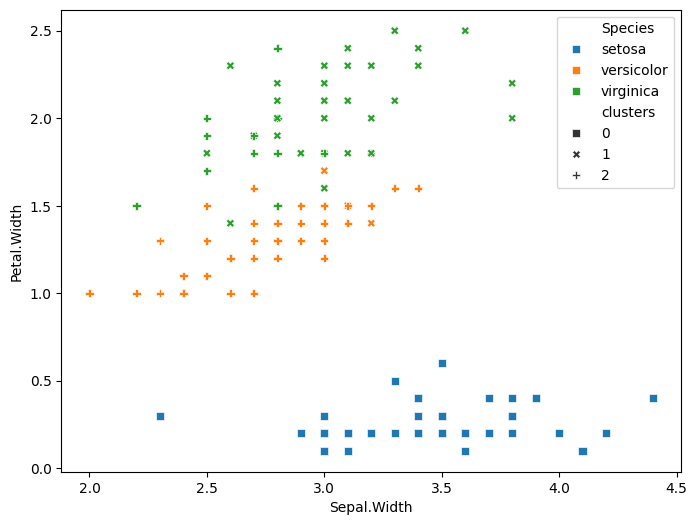

In [184]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=iris, 
                hue='Species', style='clusters', 
                markers= {0: "s", 1: "X", 2: "P"});

We run the KMeans algorithm (from scikit learn) on the data  and obtain 3 clusters.

How do the clusters look? 

 - All setosa are neatly included in cluster 1.
 - Versicolor are mostly in cluster 0, but 2 are in a different cluster.
 - Verginica is spread across two clusters.


In [185]:
kmeans.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [186]:
len(kmeans.fit_transform(x))

150

In [187]:
kmeans.fit_transform(x)[:3]

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534]])

In [188]:
x[:3]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2

### Right number of clusters
kmeans score is a measure of how far the data points are from the cluster centroids, expressed as a negative number.  The closer it is to zero, the better it is.  Of course, if we have the number of clusters equal to the number of observations, the score will be zero as each point will be its own centroid, with a sum of zero.  If we have only one cluster, we will have a large negative score.  

The ideal number of clusters is somewhere when we start getting diminished returns to adding more clusters.  We can run the kmeans algorithm for a range of cluster numbers, and compare the score.  

KMeans works by minimizing the sum of squared distance of each observation to their respective cluster center.  In an extreme situation, all observations would coincide with their centroid center, and the sum of squared distances will be zero.

With sklearn, we can get sum of squared distances of samples to their closest cluster center using _model_name.intertia__.  

The negative of inertia_ is model_name.score(x), where x is the dataset kmeans was fitted on.

#### Elbow Method  
The elbow method tracks the sum of squares against the number of clusters, and we can make a subjective judgement on the appropriate number of clusters based on graphing the sum of squares as below.  The sum of squares is calculated using the distance between cluster centers and each observation in that cluster.  As an extreme case, when the number of clusters is equal to the number of observations, the sum of squares will be zero.



Text(0, 0.5, 'Sum of Squares')

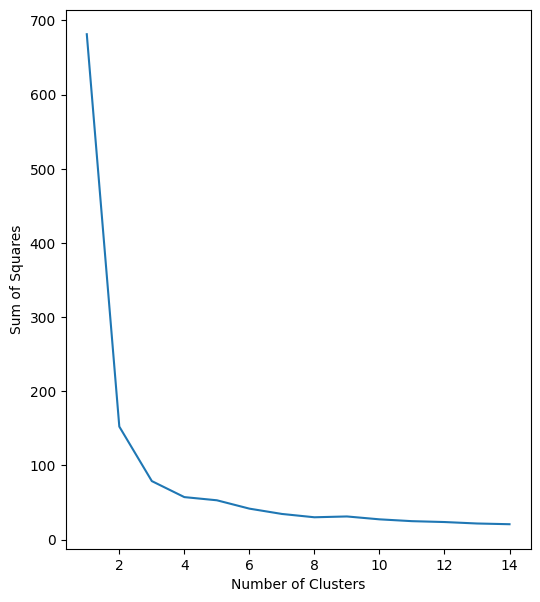

In [196]:
num_clusters = []
score = []
for cluster_count in range(1,15):
    kmeans = KMeans(cluster_count, n_init='auto')
    kmeans.fit(x)
    kmeans.score(x)
    num_clusters.append(cluster_count)
    # score.append(kmeans.score(x)) # score is just the negative of inertia_
    score.append(kmeans.inertia_)


plt.figure(figsize=(6,7))
plt.plot(num_clusters, score)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares")

In [197]:
print(kmeans.score(x))
kmeans.inertia_

-20.697284407621364


20.697284407621368

In [198]:
# Alternative way of listing labels for the training data
kmeans.labels_

array([ 1,  8,  8,  8,  1,  6,  1,  1,  8,  1,  6,  1,  8,  8,  6,  6,  6,
        1,  6,  6,  6,  6,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,  6,
        1,  1,  6,  1,  8,  1,  1,  8,  8,  1,  6,  8,  6,  8,  6,  1,  5,
        5,  5,  4,  5,  2,  5,  7,  5,  4,  7,  2,  4,  2,  4,  5,  2,  4,
       13,  4, 10,  4, 13,  2,  5,  5,  5,  5,  2,  4,  4,  4,  4, 10,  2,
        2,  5, 13,  2,  4,  2,  2,  4,  7,  4,  2,  2,  2,  7,  4, 11, 10,
        3,  0, 11,  9,  2,  3,  0, 11, 12,  0, 12, 10, 10, 12,  0,  9,  9,
       13, 11, 10,  9, 10, 11,  3, 10, 10,  0,  3,  3,  9,  0,  0,  0,  3,
       11,  0, 10, 12, 11, 12, 10, 11, 11, 12, 10, 12, 12, 10])

#### Silhouette Plot  
The silhouette plot is a measure of how close each point in one cluster is to points in the neighboring clusters.  It provides a visual way to assess parameters such as the number of clusters visually.  It does so using the silhouette coefficient.

Silhouette coefficient - This measure has a range of [-1, 1].  Higher the score the better, so +1 is the best result.

The silhouette coefficient is calculated individually for every observation in a cluster as follows:  (b - a) / max(a, b). 'b' is the distance between a sample and the nearest cluster that the sample is not a part of.  'a' is the distance between the sample and the cluster it is a part of.  One would expect b - a to be a positive number, but if it is not, then likely the point is misclassified.

`sklearn.metrics.silhouette_samples(X)` - gives the silhouette coefficient for every point in X.  
`sklearn.metrics.silhouette_score(X)` - gives mean of the above.

The silhouette plot gives the mean (ie silhouette_score) as a red vertical line for the entire dataset for all clusters.  Then each cluster is presented as a sideways histogram of the distances of each of the datapoints.  The fatter the representation of a cluster, the more datapoints are included in that cluster. 

Negative points on the histogram indicate misclassifications that may be difficult to correct as moving them changes the centroid center.



For n_clusters = 2 The average silhouette_score is : 0.6810461692117465
For n_clusters = 3 The average silhouette_score is : 0.5511916046195927
For n_clusters = 4 The average silhouette_score is : 0.49535632852885064
For n_clusters = 5 The average silhouette_score is : 0.48989824728439524
For n_clusters = 6 The average silhouette_score is : 0.47711750058213453


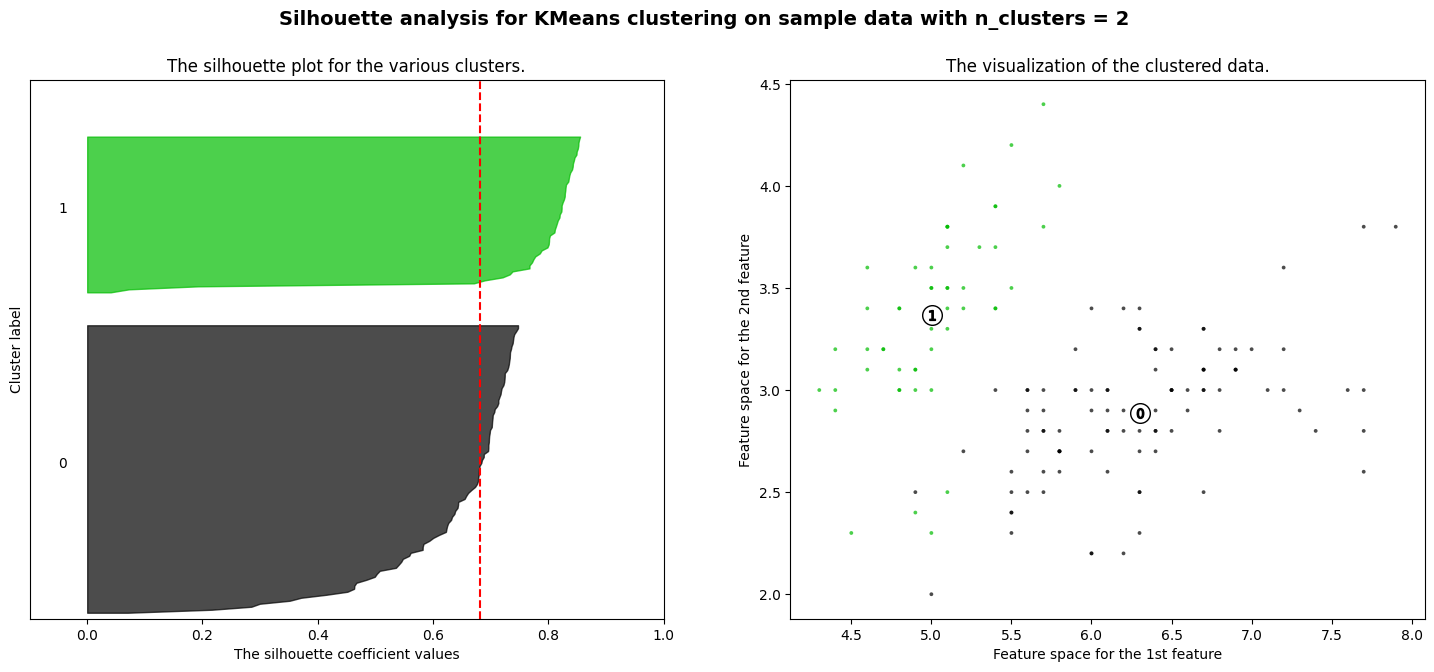

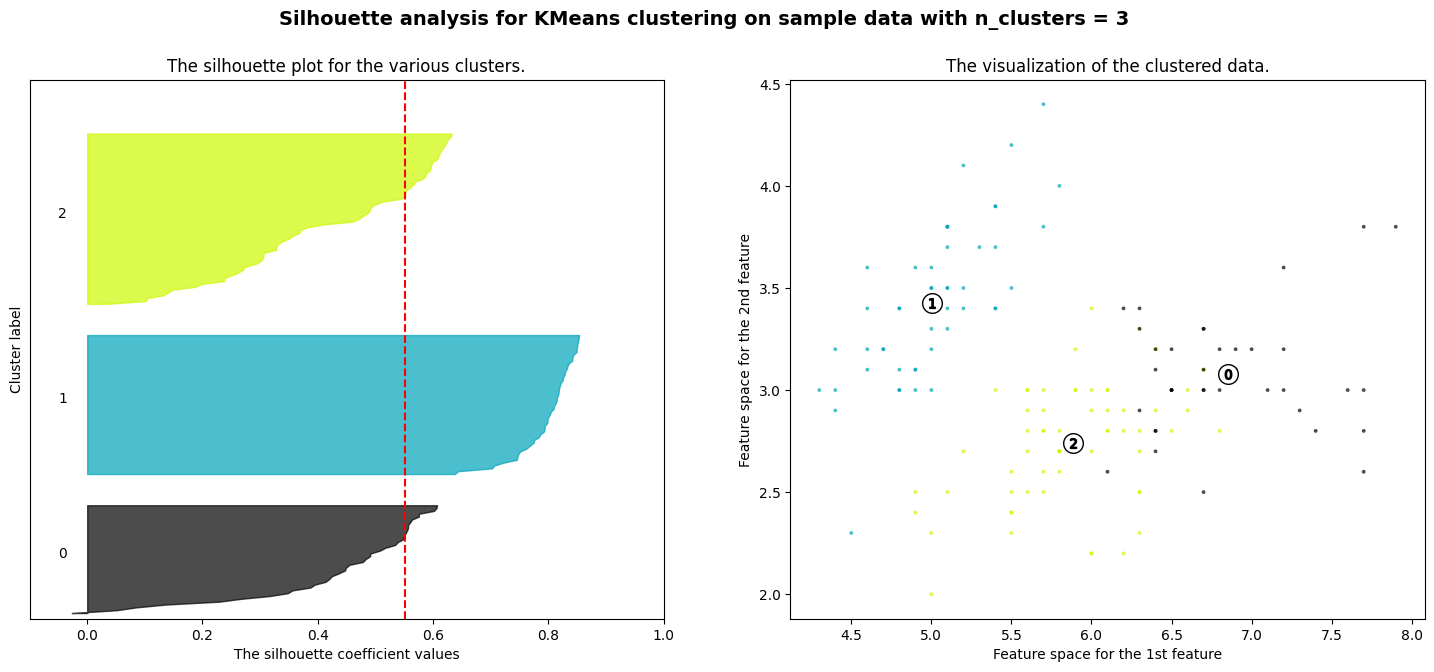

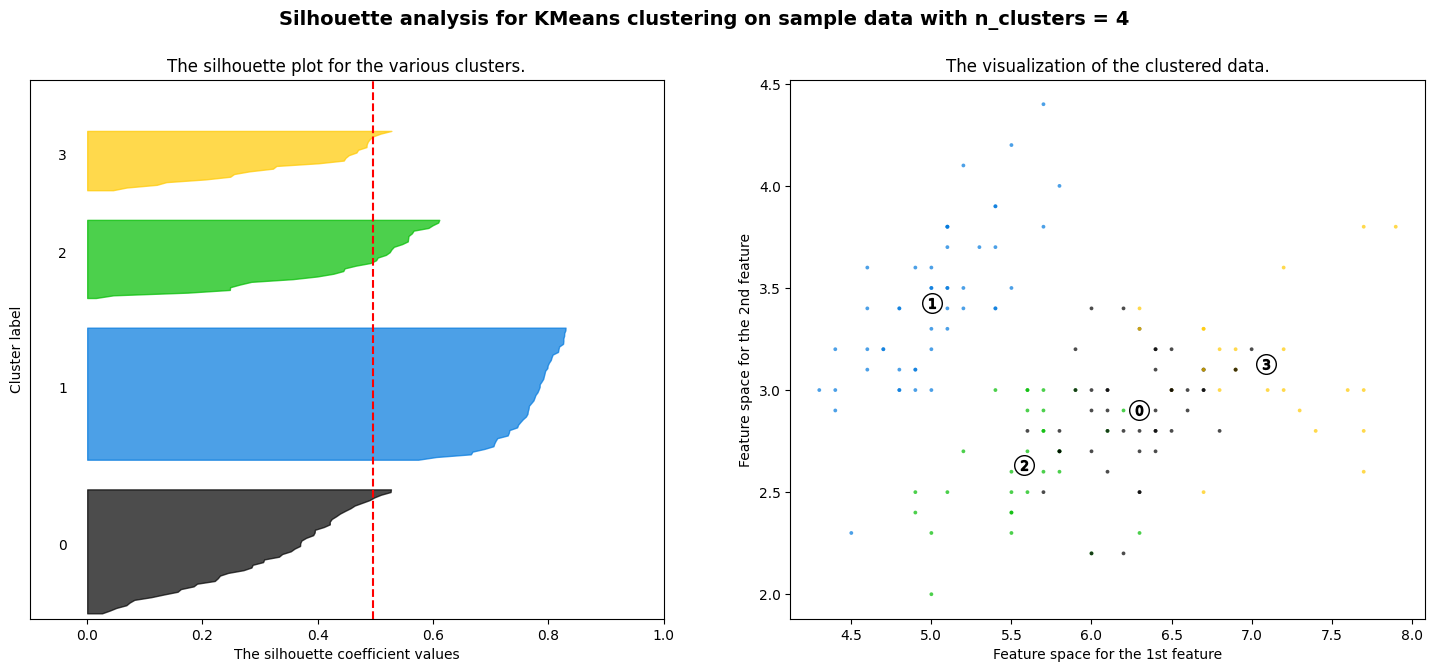

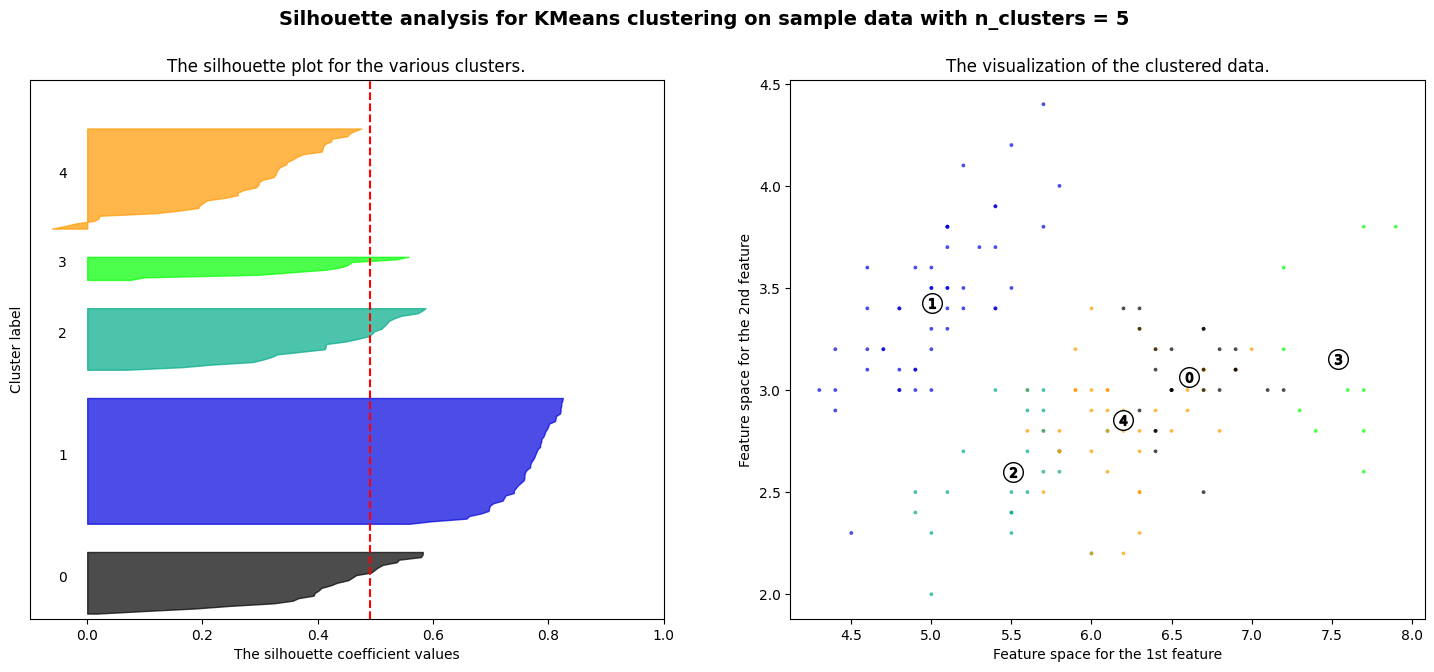

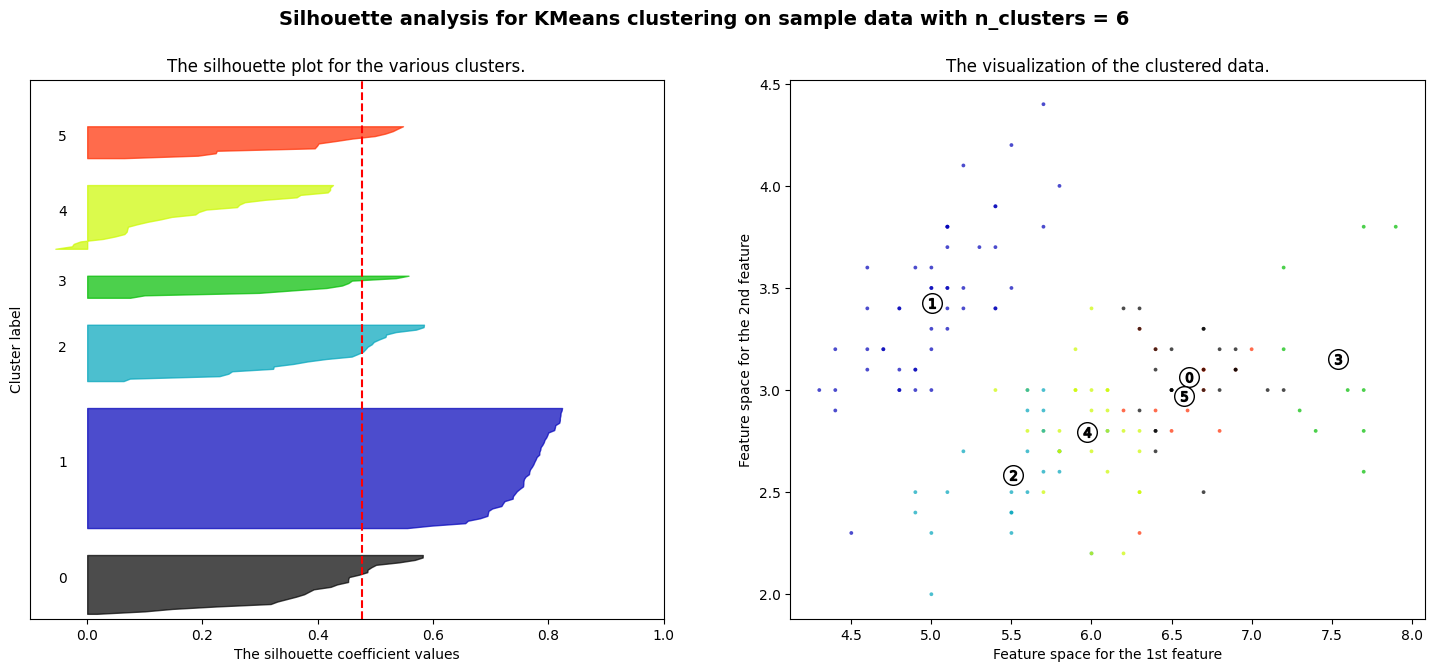

In [199]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        np.array(x)[:, 0], np.array(x)[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Hierarchical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.  The point of hierarchical clustering is to organize observations that are close together, and separate them out into groups/clusters.  Closeness is generally a measure of distance between observations, the primary measures being Euclidean, Manhattan or Cosine. You have to pick the one that makes sense for your situation.  

For most uses, Euclidean distance (often the default) does a great job.  Cosine distances are more useful when doing natural language analysis.  

**Agglomerative Clustering**  
Agglomerative Clustering is a bottom up approach: each observation starts in its own cluster, and closest clusters are successively merged together. The ‘linkage criteria’ is a parameter passed to the sklearn function for performing the clustering.  
 - Single linkage (default) minimizes the distance between the closest observations of pairs of clusters.  
 - Ward minimizes the sum of squared differences within all clusters.   
 - Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.  
 - Average linkage minimizes the average of the distances between all observations of pairs of clusters.  
 
Agglomerative cluster has a "rich get richer" behavior that leads to uneven cluster sizes. In this regard, single linkage is the worst strategy, and Ward gives the most regular sizes.  

**Example**  
Recall the mtcars dataset that has numerical information on 32 models of cars.  Let us apply agglomerative clustering to it.  We will first standardize, or rescale the data, to make sure no individual feature overwhelms the other due to its scale.  Then we will run the clustering algorithm, and present the result as a dendrogram.  


In [200]:
mtcars = sm.datasets.get_rdataset('mtcars').data
data = mtcars.iloc[:, :]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data) 
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

mpg       cyl      disp        hp      drat        wt      qsec  \
0  0.153299 -0.106668 -0.579750 -0.543655  0.576594 -0.620167 -0.789601   
1  0.153299 -0.106668 -0.579750 -0.543655  0.576594 -0.355382 -0.471202   
2  0.456737 -1.244457 -1.006026 -0.795570  0.481584 -0.931678  0.432823   
3  0.220730 -0.106668  0.223615 -0.543655 -0.981576 -0.002336  0.904736   
4 -0.234427  1.031121  1.059772  0.419550 -0.848562  0.231297 -0.471202   

         vs        am      gear      carb  
0 -0.881917  1.208941  0.430331  0.746967  
1 -0.881917  1.208941  0.430331  0.746967  
2  1.133893  1.208941  0.430331 -1.140108  
3  1.133893 -0.827170 -0.946729 -1.140108  
4 -0.881917 -0.827170 -0.946729 -0.511083

Next, we perform the clustering and present the results as a dendrogram.
The x-axis is the observations, and the y axis is the distances


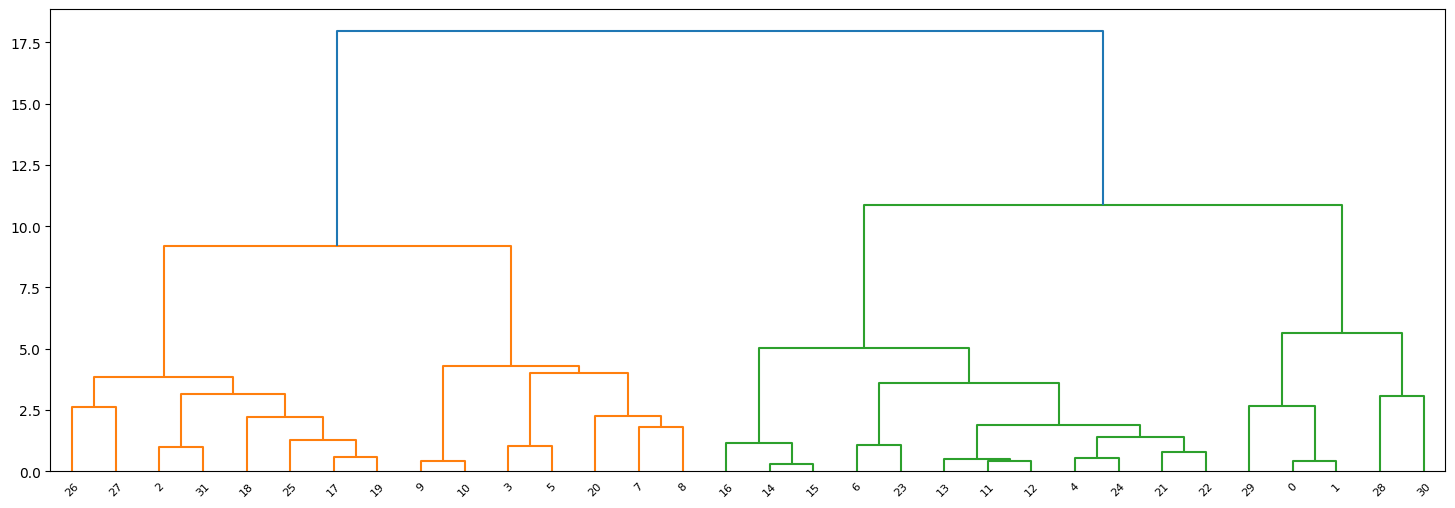

In [201]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
X = data_scaled
Z = linkage(X, method='ward')
fig = plt.figure(figsize=(18, 6))
dn = dendrogram(Z)


Question is, what can you do with this dendrogram? 
Answer is, that by ‘cutting’ the dendrogram at the right height, you can get any number of clusters or groups that you desire.


In [202]:
# Fixing some pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [203]:
# Look at the clusters to which each observation has been assigned

pd.DataFrame(cut_tree(Z, n_clusters=4, height=None)).transpose()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
0   0   0   1   2   3   2   3   2   2   2   2   3   3   3   3   3   3   1   1   1   2   3   3   3   3   1   1   1   0   0   0   1

In [204]:
# Look at the value counts by cluster number

pd.DataFrame(cut_tree(Z, n_clusters=4, height=None)).value_counts()

0
3    12
1     8
2     7
0     5
Name: count, dtype: int64

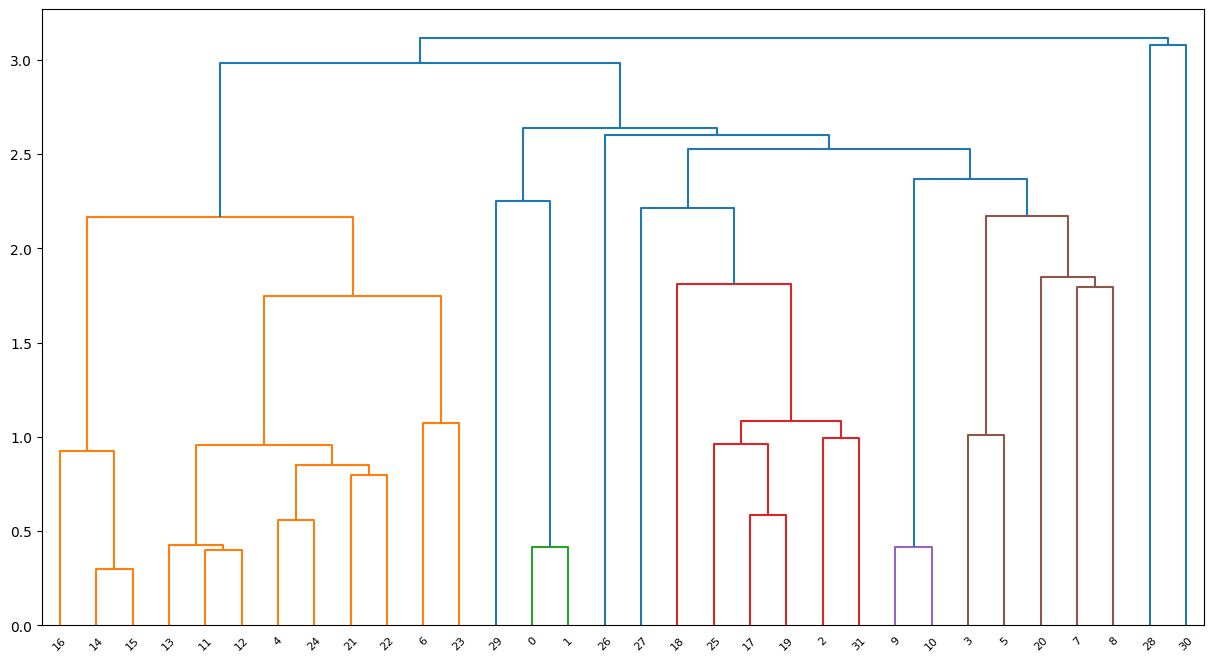

In [205]:

Z = linkage(X, method='single')
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
plt.show()

In [206]:
# Look at the clusters to which each observation has been assigned

pd.DataFrame(cut_tree(Z, n_clusters=4, height=None)).transpose()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
0   0   0   0   0   1   0   1   0   0   0   0   1   1   1   1   1   1   0   0   0   0   1   1   1   1   0   0   0   2   0   3   0

In [207]:
# Look at the value counts by cluster number

pd.DataFrame(cut_tree(Z, n_clusters=4, height=None)).value_counts()

0
0    18
1    12
2     1
3     1
Name: count, dtype: int64

## Key Takeaways  
Understanding and defining the $X$ and $y$ (the predictors and the target variable) is the most important activity in modeling.  If this isn’t done right, no model can help.  (Garbage in, garbage everywhere!)

Models pre-built in libraries have default settings for parameters that often work out of the box with reasonable performance.  Once a modeling technique is decided, then the parameters should be reviewed and tweaked if needed.  

A model once built needs to be monitored for drift, which means the world may shift while the model stays the same.  Models will need retraining every once in a while as new data becomes available.  

Model objects in Python can be saved as a pickle file using either the Pickle or Joblib library.  (How? Refer next page.)  Various libraries offer the ability to save pickle file, but sometimes a pickle file created by one library may error out if loaded back through another library.  

***
## Pickle

Once you create a model, you can save it as a pickle file.  Example code below. 
```python
from joblib import dump, load
dump(model_name, 'filename.pickle') 
```

Then reload it as follows:
```python
model_reloaded = load('filename.pickle') 
```

***
## END 
***

## Random stuff
### Distances

In [208]:
X = [[0, 1, 2],
     [3, 4, 5]]

from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric(metric = 'euclidean')
dist.pairwise(X)

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [209]:
diamonds = sns.load_dataset("diamonds")

In [210]:
X = diamonds.iloc[:4,4:]

In [211]:
X

depth  table  price     x     y     z
0   61.5   55.0    326  3.95  3.98  2.43
1   59.8   61.0    326  3.89  3.84  2.31
2   56.9   65.0    327  4.05  4.07  2.31
3   62.4   58.0    334  4.20  4.23  2.63

In [212]:
dist.pairwise(X)

array([[ 0.        ,  6.23919867, 11.05407165,  8.60087205],
       [ 6.23919867,  0.        ,  5.04861367,  8.9504525 ],
       [11.05407165,  5.04861367,  0.        , 11.33139444],
       [ 8.60087205,  8.9504525 , 11.33139444,  0.        ]])

In [213]:
from sklearn.metrics.pairwise import cosine_similarity

In [214]:
x = [1, 1, 0]
y = [0, 1, 0]

In [215]:
import scipy
scipy.spatial.distance.cosine(x,y)

0.29289321881345254

In [216]:
1- scipy.spatial.distance.cosine(x,y)

0.7071067811865475

In [217]:
cosine_similarity([x,y])

array([[1.        , 0.70710678],
       [0.70710678, 1.        ]])

#### Diagram for LDA

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sm.datasets.get_rdataset('iris').data

In [219]:
iris[iris['Species'].isin(['setosa', 'versicolor'])]


Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
5            5.4          3.9           1.7          0.4      setosa
6            4.6          3.4           1.4          0.3      setosa
7            5.0          3.4           1.5          0.2      setosa
8            4.4          2.9           1.4          0.2      setosa
9            4.9          3.1           1.5          0.1      setosa
10           5.4          3.7           1.5          0.2      setosa
11           4.8          3.4           1.6          0.2      setosa
12           4.8          3.0           1.4          0.1      setosa
13           4.3          3.0           1.1          0.1      setosa
14           5.8          4.0           1.2          0.2      setosa
15           5.7          4.4           1.5          0.4      setosa
16           5.4          3.9           1.3          0.4      setosa
17           5.1          3.5           1.4          0.3      setosa
18           5.7          3.8           1.7          0.3      setosa
19           5.1          3.8           1.5          0.3      setosa
20           5.4          3.4           1.7          0.2      setosa
21           5.1          3.7           1.5          0.4      setosa
22           4.6          3.6           1.0          0.2      setosa
23           5.1          3.3           1.7          0.5      setosa
24           4.8          3.4           1.9          0.2      setosa
25           5.0          3.0           1.6          0.2      setosa
26           5.0          3.4           1.6          0.4      setosa
27           5.2          3.5           1.5          0.2      setosa
28           5.2          3.4           1.4          0.2      setosa
29           4.7          3.2           1.6          0.2      setosa
30           4.8          3.1           1.6          0.2      setosa
31           5.4          3.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
34           4.9          3.1           1.5          0.2      setosa
35           5.0          3.2           1.2          0.2      setosa
36           5.5          3.5           1.3          0.2      setosa
37           4.9          3.6           1.4          0.1      setosa
38           4.4          3.0           1.3          0.2      setosa
39           5.1          3.4           1.5          0.2      setosa
40           5.0          3.5           1.3          0.3      setosa
41           4.5          2.3           1.3          0.3      setosa
42           4.4          3.2           1.3          0.2      setosa
43           5.0          3.5           1.6          0.6      setosa
44           5.1          3.8           1.9          0.4      setosa
45           4.8          3.0           1.4          0.3      setosa
46           5.1          3.8           1.6          0.2      setosa
47           4.6          3.2           1.4          0.2      setosa
48           5.3          3.7           1.5          0.2      setosa
49           5.0          3.3           1.4          0.2      setosa
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
55           5.7          2.8           4.5          1.3  versicolor
56           6.3          3.3           4.7          1.6  versicolor
57

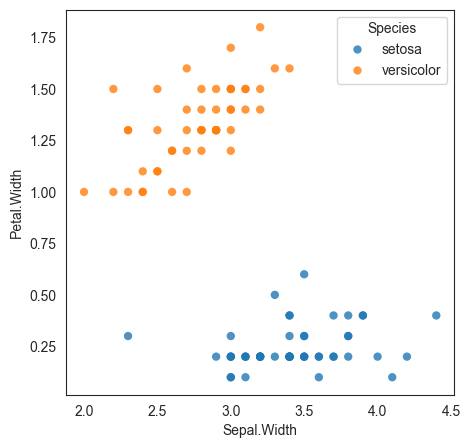

In [220]:
iris = iris[iris['Species'].isin(['setosa', 'versicolor'])]
sns.set_style(style='white')
plt.figure(figsize = (5,5))
sns.scatterplot(data = iris, x = 'Sepal.Width', y = 'Petal.Width', hue = 'Species', alpha = .8, edgecolor = 'None');

#### Multiple classifiers all at once

In [221]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [222]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

In [223]:
# load the data

college = pd.read_csv('collegePlace.csv')

X = college[['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']]
X = pd.get_dummies(X)
y = college['PlacedOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
results = []
for clf in classifiers:
    try:
        clf.fit(X_train, y_train, verbose=False)
    except:
        clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({'Model': clf.__class__.__name__, 'Accuracy': accuracy_score(y_test, y_pred)})

print(pd.DataFrame(results))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1320, number of negative: 1052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 2372, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.556492 -> initscore=0.226939
[LightGBM] [Info] Start training from score 0.226939
                         Model  Accuracy
0       RandomForestClassifier  0.877104
1   GradientBoostingClassifier  0.878788
2           AdaBoostClassifier  0.873737
3           LogisticRegression  0.771044
4                          SVC  0.786195
5         KNeighborsClassifier  0.867003
6       DecisionTreeClassifier  0.875421
7          ExtraTreeClassifier  0.872054
